# Character Language Modelling
- Deadline: 29-Oct-2025 (11:59 PM)
- Submission: https://forms.gle/CnEC9mBY5wufJQSVA

# **Assignment Instructions:**

1. Read all Instructions carefully provided for each question before beginning your work.

2. Analyze each question thoroughly and document your result, analysis, and solutions within the Google Colab notebook itself.


3. This is an individual assignment. Your work should be original. Copying from peers or online sources is strictly prohibited.

4. The use of AI tools like ChatGPT, Copilot, Gemini, LLMs or any other automated code generation tools for writing code is strictly forbidden. We will be taking your Viva for evaluating the assignment.

5. Clearly document your code with comments and explanations so that it is easy to understand your approach and thought process. It is ok to take help from some external tutorial; however cite it in your documenation otherwise it will be considered plagiarism.

6. Follow the submission guidelines strictly. Make sure your notebook is well-organized and includes all necessary code, explanations, and outputs.

7. **Once you submit your assignment, a viva will be taken to evalute you.
For the assignment submission you will have to download this colab notebook as .ipynb file, zip it and submit it via this form:https://forms.gle/CnEC9mBY5wufJQSVA**
8. The name of the zip file should follow this format: "CS779-A5-[Firstname]-[Lastname]-[Rollno].zip", where [Firstname]-[Lastname]-[Rollno] is same as your discord username. If you fail to do this, then we will not able to recover your assignment from pool of assignments as the process is automated.

9. The above form will close at the above mentioned deadline and no further solutions will be accepted either by email or by any other means.

10. If you have any doubt or get stuck in any problem, consult  TA's over Discord. It's better to take help of TAs than cheating.



#**Enter your details below:**

Full Name:  Subham Anand

Roll No:  221093

Email:  subhamanand.2004@gmail.com




# FOLDER STRUCTURE
```md
CS779_A5_Submission/
├─ notebooks/
│  └─ CS779_A5_Answers_Template.ipynb
│
├─ experiments/
│  ├─ results/
│  │  ├─ q1/
│  │  │  ├─ meta.json
│  │  │  └─ log_pretrain.csv              
│  │  ├─ q2/
│  │  │  └─ metrics.csv                   
│  │  │   
│  │  └─ q3d/
│  │     ├─ metrics.csv       
│  │     ├─ history.csv             
│  │     └─ roc_points.csv                
│  └─ figures/
│     ├─ q1/
│     │  ├─ plot_pretrain_train_loss.png
│     │  ├─ plot_pretrain_val_loss.png
│     │  └─ plot_pretrain_val_ppl.png
│     ├─ q2/
│     │  ├─ plot_train_loss.png          
│     │  └─ plot_val_cer.png                 
│     └─ q3d/
│        ├─ acc_curve.png                 
│        ├─ loss_curve.png                
│        └─ roc_curve.png                 
│
└─ README.md
```

# Character-level Causal Language Model – Pretraining (Fully Explained) [Implementation - 200 Marks]

Language models are the engines behind today’s AI text generators. Popular models including ChatGPT, Llama etc. generate text by predicting the next-token (I hope you remember tokens from previous assignments). Instead of predicting words/tokens, character-level language models learn language at the tiniest possible unit — the character. This means that, given just a few starting letters, the model can generate entire words and sentences from scratch. Think of it as teaching a computer how to spell and write creatively at the same time.

Let’s make this idea concrete. Suppose you feed the model an initial string like:

```text
The sun se
```

A word-level model might struggle if “sets” or “serpent” are rare words in its training data. But a character-level model can continue letter by letter: t, s, e, … composing “sets beyond the hills.” It does this by learning statistical patterns — which characters tend to follow which others — and by remembering longer structures, such as how sentences often end with a period or new line.

### **Why Character-Level Models Matter**

Character-level models are simple yet powerful:
- They don’t need tokenizers — just a list of characters.
- They’re great for low-resource languages or for handling creative or noisy text (like social media posts or code).
- They form the foundation for more advanced neural architectures, like decoder-only transformers used in models such as GPT.

### **Understanding the Decoder-Only Transformer**

A decoder-only transformer is the architecture at the heart of models like GPT. It builds upon three main concepts:
- Causal multi-head self-attention: Each token (or character) only attends to earlier ones, preserving the left-to-right flow of language. Additionally, multi-head attention ensures that multiple qualities of the text are attended to.
- Feed-forward layers: These refine each token’s hidden representation.
- Residual and normalization layers: They help stabilize training and maintain information across layers.

Multiple such blocks are stacked to form the full model. The output from the final layer predicts the next character using a classification head.

Visualizing this helps a lot. Here are some student-friendly visual guides to explore:
- [Decoder-only Transformer Diagram (Substack)](https://cameronrwolfe.substack.com/p/decoder-only-transformers-the-workhorse) — a clear depiction of self-attention and block stacking.
- [Transformer Architecture Illustrated (Hugging Face LLM Course)](https://huggingface.co/learn/llm-course/en/chapter1/6) — introduction with intuitive sequence flow.
- [Poloclub Transformer Explainer (Interactive)](https://poloclub.github.io/transformer-explainer/) — try out a live GPT-2 visualization to see predictions evolve in real time.

### **Bringing It All Together**

In this assignment, you’ll:

- Build your own character-level model.
- Train it to generate text character by character.
- Finetune it to:
  - Correct spellings in input text.
  - Find the correct sentiment of a sentence from IMDb sentiment challenge.

By the end, you’ll understand not just how models like GPT predict words — but how they first learned to predict letters.

---

<!-- This assignment is about training a Language Model; given compute restrictions, we will be developing a character language model, but the ideas we learn can easily be generalized and used for developing a full-fledged language model. -->

This notebook walks you through **every step** needed to pretrain a character‑level causal language model (Char‑LM) on WikiText‑103 (raw).  
It includes detailed explanations, code, logging, plots, checkpointing, and a final report.


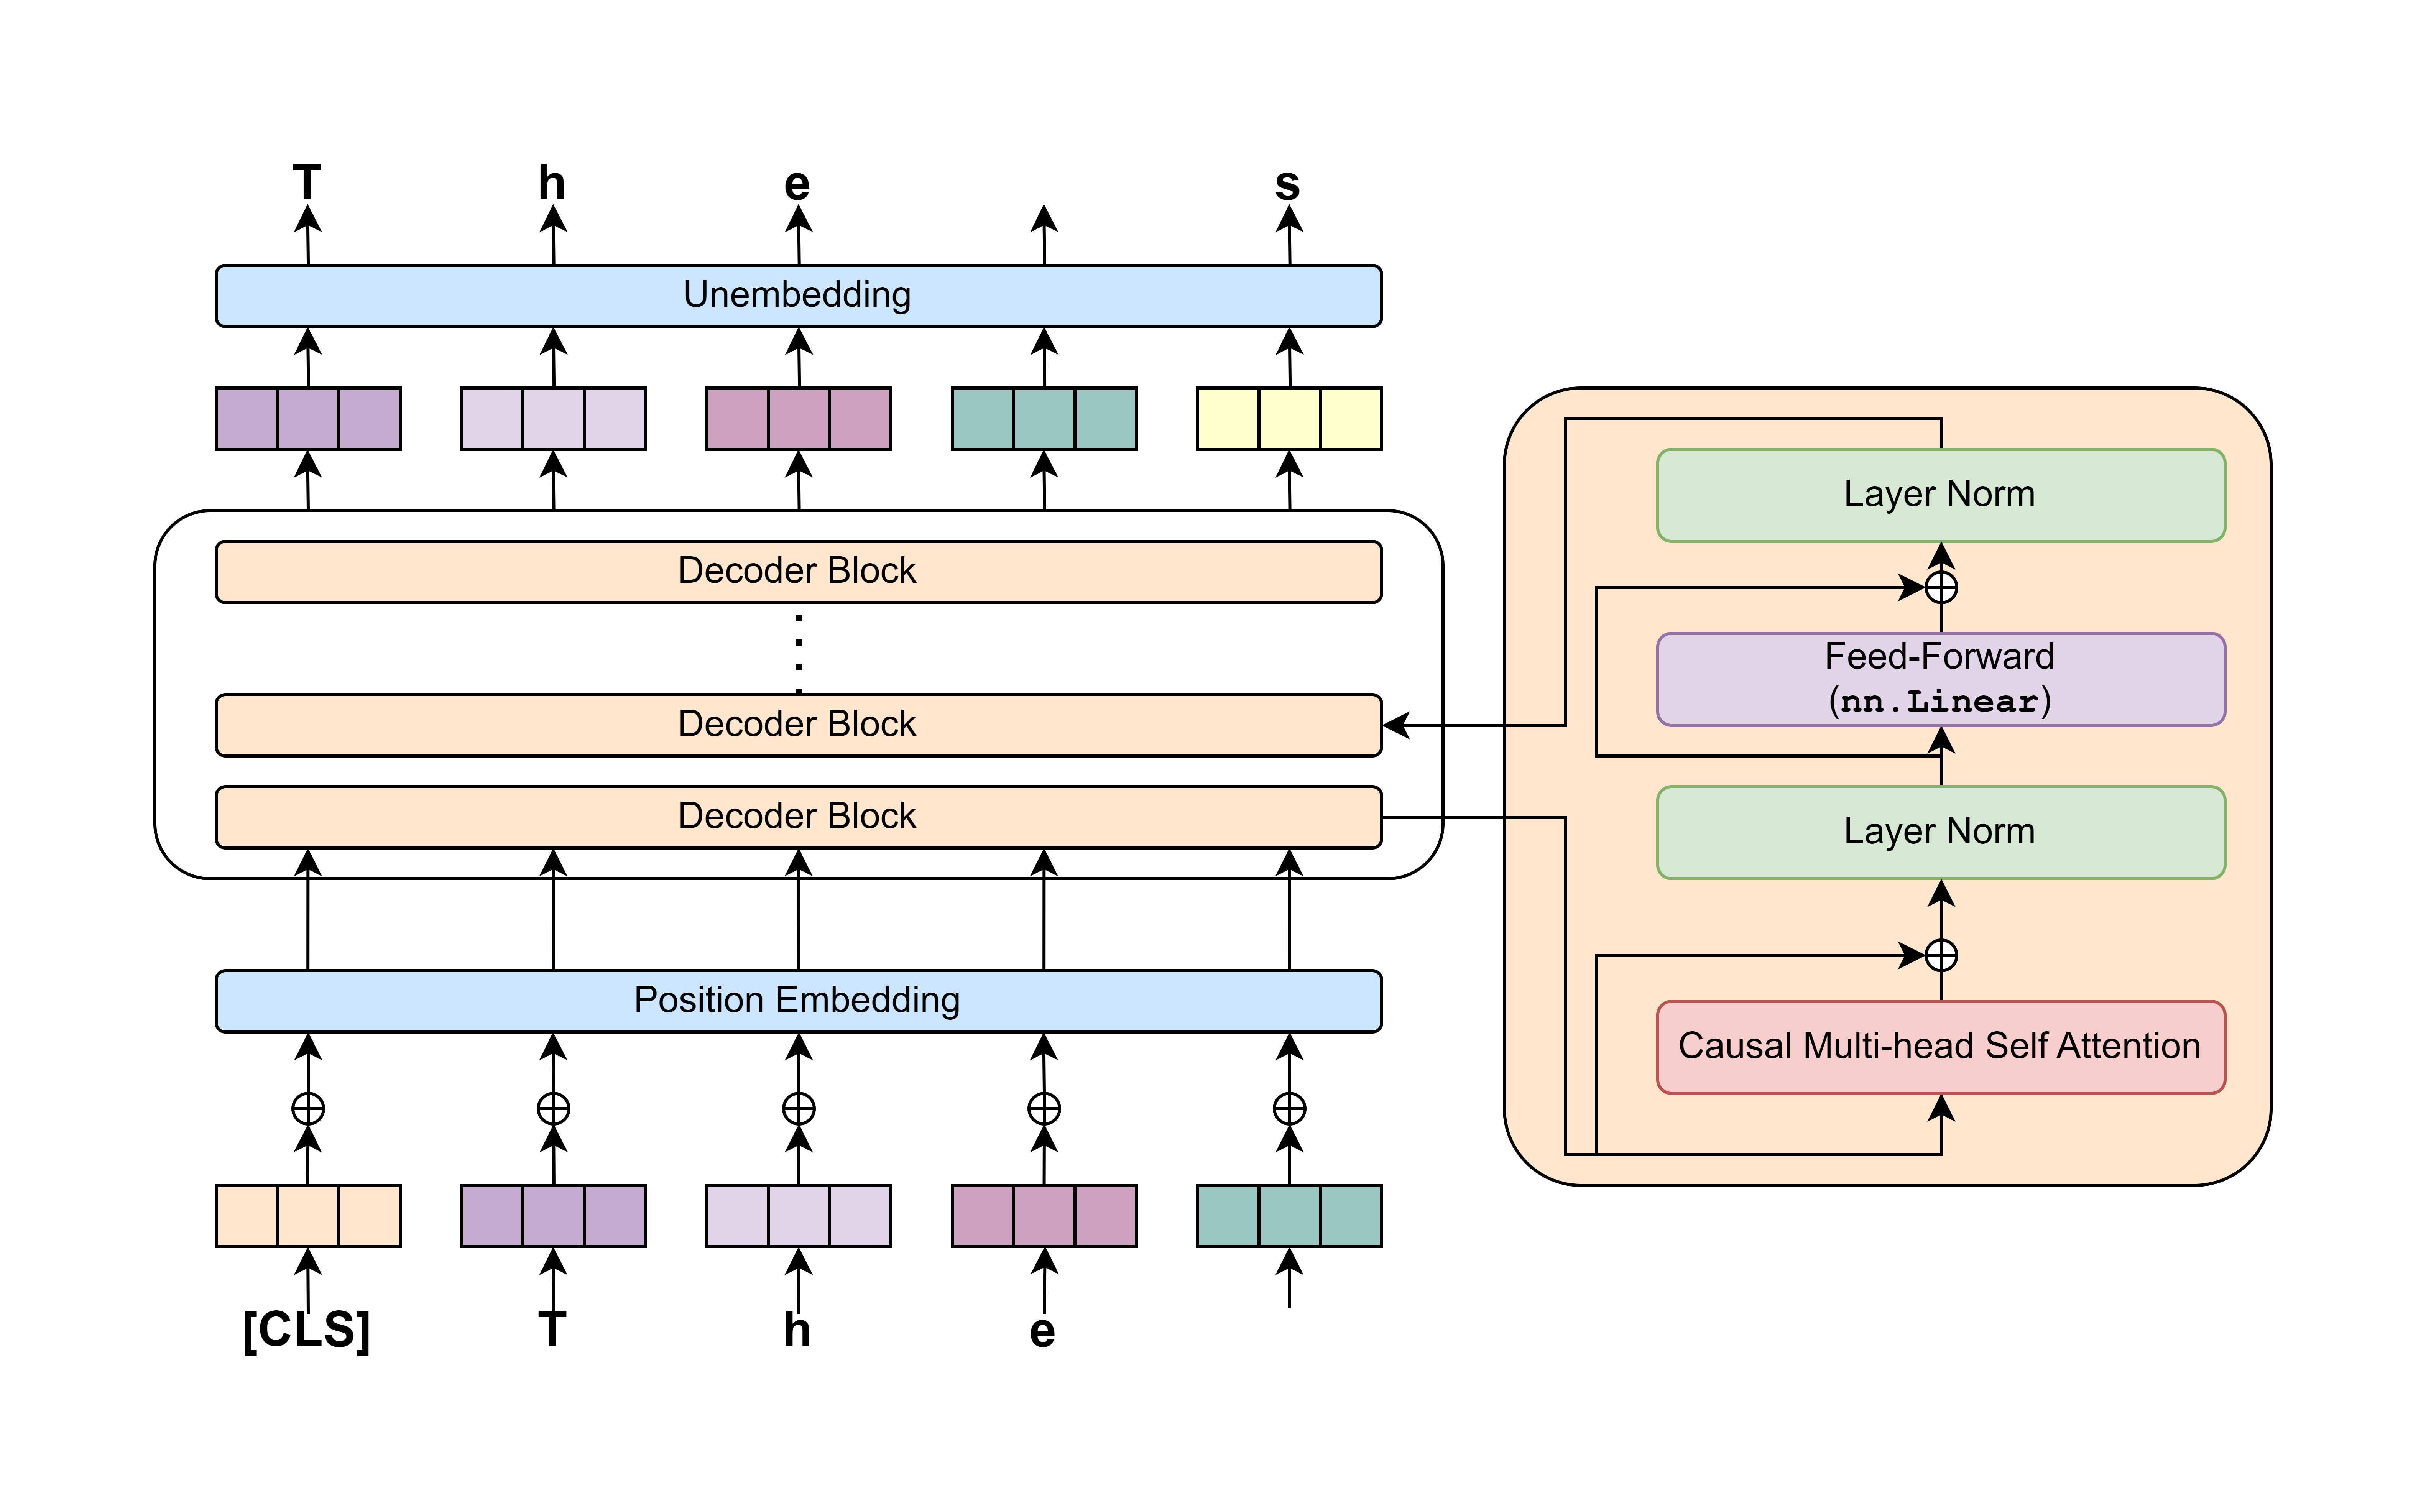


## Goals & Outputs

**Goal:** Train a char‑level LM that predicts the next character given all previous characters (causal / autoregressive).

**We will cover:**
1. Reproducible configuration & environment setup  
2. Dataset loading & sentence preparation (WikiText‑103 raw)  
3. Character vocabulary (including `<PAD>`, `<BOS>`, `<EOS>`, `<SEP>`)  
4. Tokenization at **character** level + padding/truncation strategy  
5. Model architecture in depth (embeddings → positional → Transformer layers with **causal mask** → LayerNorm → LM head)  
6. Loss, metrics, and why **perplexity** is the primary metric for language modeling  
7. Training loop with AMP, gradient clipping, AdamW, cosine LR schedule, checkpoints (best/last)  
8. Logging to CSV, saving plots (train loss, val loss, val perplexity), and a final report  
9. Practical stability/throughput tips + troubleshooting

**Artifacts produced in `save_dir/`:**
- `log_pretrain.csv`  (epoch-wise train/val metrics)  [loss and perplexity]
- `plot_pretrain_train_loss.png`, `plot_pretrain_val_loss.png`, `plot_pretrain_val_ppl.png`  
- `meta.json`  (vocab + model/training config)



## Prerequisites

Uncomment the following cell if you're in a fresh environment:


In [ ]:

!pip install -q torch datasets tqdm matplotlib pandas



## 1) Config and Reproducibility

We define a simple dataclass `CFG` to keep all training knobs in one place.  
We also set seeds to make results repeatable (as much as possible).


In [ ]:

import os, json, math, random, string, csv
from dataclasses import dataclass
from typing import List, Dict
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

os.environ.setdefault("CUDA_VISIBLE_DEVICES", "0")
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

@dataclass
class CFG:
    save_dir: str = "checkpoints_charLM" # the directory to which the checkpoints are saved
    subset_size: int = 100_000  # Size of the training dataset
    max_len: int = 256  # Context + generation length
    batch_size: int = 64  # training batch size
    num_workers: int = 2  # number of parallel GPUs to use
    d_model: int = 512  # dimensionality of the residual stream also the output dimension of the embedding layer.
    n_heads: int = 8  # Number of heads in the multi-head self attention block
    n_layers: int = 8 # Number of decoder blocks in the model
    dropout: float = 0.1  # dropout (if required)
    epochs: int = 5 # number of training epochs
    lr: float = 1e-4  # learning rate
    weight_decay: float = 0.01  # weight decay, applicable to AdamW loss
    grad_clip: float = 1.0  # Usually required so that we can prevent the model from changing the parameters by a large value due to a noisy batch
    seed: int = 42  # A seed to control the randomness introduced by torch, numpy or any other compute library

CFG = CFG()
os.makedirs(CFG.save_dir, exist_ok=True)

def set_seed(seed: int):
    '''Setting the seed for python random, numpy and torch and torch.cuda'''
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

set_seed(CFG.seed)


Device: cuda



## 2) Data Loading and Sentence Preparation




Downloads and prepares the dataset (e.g., WikiText/OpenWebText for LM or IMDb for sentiment).  
May perform lightweight sentence splitting, filtering by length, and shuffling.

**Expected outputs:** Printed counts (e.g., number of sentences/rows). First-time runs may download data and show progress bars.


In [ ]:
from datasets import load_dataset
ds = load_dataset("wikitext","wikitext-103-raw-v1", split="train")

README.md: 0.00B [00:00, ?B/s]

wikitext-103-raw-v1/test-00000-of-00001.(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-103-raw-v1/train-00000-of-00002(…):   0%|          | 0.00/157M [00:00<?, ?B/s]

wikitext-103-raw-v1/train-00001-of-00002(…):   0%|          | 0.00/157M [00:00<?, ?B/s]

wikitext-103-raw-v1/validation-00000-of-(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1801350 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset

def load_wikitext_sentences(subset_size=None):
  '''
  Loads sentences from the "wikitext-103-raw-v1" dataset.

  Args:
    subset_size (int, optional): The number of sentences to load.
      If None, all available sentences after filtering are loaded.

  Returns:
    list: A list of cleaned and shuffled sentences.
  '''
  ds = load_dataset("wikitext","wikitext-103-raw-v1", split="train")
  texts = [t.strip() for t in ds["text"] if t and len(t.strip()) > 0]
  sents = []
  for p in texts:
      p = p.replace("\n", " ")
      for s in p.split("."):
          s = s.strip()
          if 10 <= len(s) <= 300:
              sents.append(s)
  random.shuffle(sents)
  if subset_size is not None:
      sents = sents[:subset_size]
  return sents

print("Loading sentences...")
all_sents = load_wikitext_sentences(subset_size=CFG.subset_size)
print(f"Prepared sentences: {len(all_sents):,}")

Loading sentences...
Prepared sentences: 100,000



## 3) Character Vocabulary


**Task:** Implement a function that constructs a **character-level vocabulary** from a list of text sentences, including special symbols and extra characters.

#### Requirements
1. **Input:**
   - `sents`: a `List[str]` containing sentences.
   - `extra`: an optional `str` of additional characters to include in the vocabulary.

2. **Counting characters:**
   - Use Python’s `collections.Counter` to count all characters appearing in the sentences.
   - Update the counter to include the characters from `extra` even if they don’t appear in the data.

3. **Special tokens:**
   - Include the following tokens at the beginning of the vocabulary (with fixed indices):
     ```python
     SPECIAL = ['<PAD>', '<BOS>', '<EOS>', '<SEP>']
     ```
   - Assign each of these tokens a unique integer ID before adding other characters.

4. **Vocabulary construction:**
   - Build a **string-to-index mapping** (`stoi`) containing the special tokens first, then all remaining unique characters in sorted order.
   - Create the corresponding **index-to-string mapping** (`itos`) by reversing this mapping.

5. **Return values:**
   - The function `build_char_vocab` must return:
     ```python
     return stoi, itos
     ```

6. **Constants and usage:**
   - Extract the IDs of the special tokens as:
     ```python
     PAD_ID, BOS_ID, EOS_ID, SEP_ID = [stoi[t] for t in ['<PAD>', '<BOS>', '<EOS>', '<SEP>']]
     ```
   - Compute the total vocabulary size with `VOCAB_SIZE = len(stoi)`.

7. **Example behavior:**
   - If `all_sents` has more than 5000 sentences, use only the first 5000 to build the vocabulary.
   - Add common English letters, digits, punctuation, and newline characters using:
     ```python
     extra = string.ascii_letters + "0123456789 .,!?;:'\"-()[]\n"
     ```

The final code should print out the complete **vocabulary size** and produce valid lookup tables for character-level text processing.

<!-- Builds a character-level vocabulary (`stoi`/`itos`) from a small sample plus a safe extra alphabet.  
Ensures special tokens `<PAD>`, `<BOS>`, `<EOS>`, `<SEP>` are included.

**Expected outputs:** Printed vocab size. No files created yet. -->


In [ ]:
# INSERT CODE HERE
import collections
import string
from typing import List, Tuple, Dict, Optional

# --- Constants ---
# Define the special tokens that must be at the start of the vocabulary
SPECIAL = ['<PAD>', '<BOS>', '<EOS>', '<SEP>']

def build_char_vocab(sents: List[str], extra: Optional[str] = None):
    """
    Constructs character-level vocabulary (stoi, itos) from a list of sentences.

    Args:
        sents: A list of text sentences to build the vocabulary from.
        extra: An optional string of extra characters to ensure are in the vocab,
               even if they don't appear in 'sents'.

    Returns:
        A tuple containing:
        - stoi (Dict[str, int]): The string-to-index mapping.
        - itos (Dict[int, str]): The index-to-string mapping.
    """

    # 1. Use Counter to count all characters in the provided sentences
    # We join all sentences into one large string to count all chars at once
    full_text = "".join(sents)
    counter = collections.Counter(full_text)

    # 2. Update the counter with the 'extra' characters
    # This ensures they are in the vocabulary even if not in 'sents'.
    # counter.update() increments counts for existing chars and adds new ones.
    for char in extra:
      if char not in counter:
          counter[char] = 0

    # 3. Build the stoi (string-to-index) mapping
    stoi = {}

    # 4. Add special tokens first with fixed indices (0, 1, 2, 3)
    for i, token in enumerate(SPECIAL):
        stoi[token] = i

    # 5. Add all other unique characters in sorted order

    # Get all unique characters that were counted (from sents + extra)
    all_unique_chars = sorted(counter.keys())

    # Get the next available index after the special tokens
    current_id = len(stoi)

    for char in all_unique_chars:
        # Only add if it's not one of the special tokens we already added
        # This check is robust, e.g., if '<' was in the text
        if char not in stoi:
            stoi[char] = current_id
            current_id += 1

    # 6. Build the itos (index-to-string) mapping by reversing stoi
    # This is a standard, efficient way to create the reverse mapping
    itos = {i: s for s, i in stoi.items()}

    # 7. Return the final mappings
    return stoi, itos


# use only the first 5000 sentences
if(len(all_sents)>5000):
  sents_to_process = all_sents[:5000]
  print(f"Sentences being used to build vocab: {len(sents_to_process)}")

# Define the 'extra' characters as required
extra_chars = string.ascii_letters + "0123456789 .,!?;:'\"-()[]\n"

# Build the vocabulary
stoi, itos = build_char_vocab(sents_to_process, extra=extra_chars)

# Extract special token IDs as required
PAD_ID, BOS_ID, EOS_ID, SEP_ID = [stoi[t] for t in SPECIAL]

# Compute the total vocabulary size
VOCAB_SIZE = len(stoi)

print(f"\n--- Vocabulary Build Complete ---")
print(f"Total vocabulary size: {VOCAB_SIZE}")



Sentences being used to build vocab: 5000

--- Vocabulary Build Complete ---
Total vocabulary size: 274



## 4) Tokenization and Collation (Character Level)


This code defines a **character-level language modeling dataset and data pipeline** using **PyTorch**. You are required to implement functions and data structures consistent with this design.

### Required Imports
You must import these essential modules and classes before using the code:
```python
import torch
from torch.utils.data import Dataset, DataLoader
```

### Key Components and Requirements
1. **Dataset Definition**  
   Implement a subclass of `torch.utils.data.Dataset` named `CleanCLMDataset`. It should:
   - Initialize with a list of text sequences (`sents`), a character-to-index dictionary (`stoi`), and a maximum sequence length (`max_len`).
   - Return the lowercase version of each text sample in `__getitem__`.
   - Provide the number of samples in `__len__`.

2. **Collate Function (`collate_clm`)**  
   Write a custom function to batch and pad character ID sequences. It should:
   - Use special tokens from `stoi`: `<PAD>`, `<BOS>`, `<EOS>`.
   - Convert each text sample into a list of token IDs: `[BOS] + [stoi[ch]] + [EOS]`.
   - Truncate or pad each sequence to `max_len` and assemble them into a `torch.LongTensor` of shape `(batch_size, T)`.

3. **Train–Validation Split**  
   Split your list of sequences (`all_sents`) into `train_sents` and `val_sents` using proportions or heuristics depending on dataset size.

4. **DataLoader Setup**  
   Construct `torch.utils.data.DataLoader` instances for training and validation:
   - `train_loader` uses shuffling (`shuffle=True`).  
   - `val_loader` does not shuffle (`shuffle=False`).  
   - Both use the `collate_clm` function for batching and may use multiple workers (`num_workers`) and pinned memory (`pin_memory=True`).

### Summary of Learning Goals
You should demonstrate understanding of:
- How to subclass and use `torch.utils.data.Dataset`.
- How to implement a `collate_fn` for sequence padding and batching.
- How to configure `DataLoader` for training and validation workflows.

<!--

Defines Dataset and Collate functions for:  
- **Clean CLM**: `[BOS] text [EOS]` sequences  
- **Denoise**: `[BOS] noisy [SEP] clean [EOS]` sequences  
Handles padding/truncation to `max_len` and returns batch tensors.

**Expected outputs:** No immediate output. Subsequent DataLoader cells will use these. -->


In [ ]:
# INSERT CODE HERE
import torch
from torch.utils.data import Dataset, DataLoader
from typing import List, Dict

class CleanCLMDataset(Dataset):
    """
    A PyTorch Dataset for Character-Level Language Modeling (CLM).

    This dataset simply stores a list of sentences and returns the
    lowercase version of a sentence when indexed.
    """

    def __init__(self, sents, stoi):
        """
        Initializes the dataset.

        Args:
            sents: A list of text sentences (strings).
            stoi: The character-to-index mapping dictionary.
            max_len: The maximum sequence length.
        """
        self.sents = sents
        self.stoi = stoi
        self.max_len = max([len(s) for s in sents])

    def __len__(self):
        """
        Provides the total number of samples (sentences) in the dataset.
        """
        return len(self.sents)

    def __getitem__(self, idx) :
        """
        Returns the lowercase version of the text sample at the given index.

        Args:
            idx: The index of the sample to retrieve.

        Returns:
            The sentence at the specified index, converted to lowercase.
        """
        # Get the raw sentence at the index
        sentence = self.sents[idx]

        # Return the lowercase version as required
        return sentence.lower()


In [ ]:
def collate_clm(batch, stoi, max_len):
    """
    Custom collate function for character-level language modeling.

    Converts a batch of text strings into a padded tensor of token IDs.

    - Each sequence is enclosed by <BOS> and <EOS> tokens.
    - Sequences are truncated if they exceed max_len (including special tokens).
    - Sequences are padded with <PAD> if they are shorter than max_len.

    Args:
        batch: A list of text strings (the raw output from the dataset).
        stoi: The character-to-index mapping dictionary.
        max_len: The target sequence length for padding/truncation.

    Returns:
        A torch.LongTensor of shape (batch_size, max_len).
    """

    # --- 1. Get special token IDs ---
    # We use .get() for safety, defaulting to 0 (<PAD>) if a token is missing,
    # though they should always be present from build_char_vocab.
    PAD_ID = stoi.get('<PAD>', 0)
    BOS_ID = stoi.get('<BOS>', 1)
    EOS_ID = stoi.get('<EOS>', 2)

    # print(stoi['A'])
    # --- 2. Process each sample in the batch ---
    processed_batch = []
    for text_sample in batch:

        # --- 3. Convert text to token IDs with special tokens ---
        # Note: We assume all characters in text_sample are in stoi
        # because the dataset was built from this text.
        token_ids = [BOS_ID] + [stoi.get(ch,PAD_ID) for ch in text_sample] + [EOS_ID]

        # --- 4. Truncate or Pad the sequence ---
        seq_len = len(token_ids)
        # Truncate first
        final_ids = token_ids[:max_len]

        if len(final_ids) < max_len:
            final_ids += [PAD_ID] * (max_len - len(final_ids))

        processed_batch.append(final_ids)

    # --- 5. Assemble into a LongTensor ---
    # Converting this to a tensor directly gives the desired (batch_size, max_len) shape.
    return torch.LongTensor(processed_batch)



In [ ]:
import random
from typing import List

train_ratio = 0.9
sents_shuffled = all_sents.copy()
random.shuffle(sents_shuffled)

# 2. Calculate the split index
split_idx = int(len(sents_shuffled) * train_ratio)

# 3. Split the list using slicing
train_sents = sents_shuffled[:split_idx]
val_sents = sents_shuffled[split_idx:]

# 4. Print the results
print(f"\n--- Data Split Complete ---")


--- Data Split Complete ---


In [ ]:
BATCH_SIZE = CFG.batch_size
NUM_WORKERS = CFG.num_workers
PIN_MEMORY = True       # Helps with faster host-to-device transfer

train_dataset = CleanCLMDataset(train_sents, stoi)
val_dataset   = CleanCLMDataset(val_sents, stoi)

max_len = CFG.max_len

# We wrap collate_clm in a lambda to pass stoi and max_len automatically
collate_fn = lambda batch: collate_clm(batch, stoi, max_len)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,                  # ✅ shuffle for training
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,                 # 🚫 no shuffle for validation
    num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    collate_fn=collate_fn
)

print(f"✅ DataLoaders created successfully:")
print(f" - Training batches: {len(train_loader)}")
print(f" - Validation batches: {len(val_loader)}")


✅ DataLoaders created successfully:
 - Training batches: 1407
 - Validation batches: 157



## 5) Model Architecture — Deep Dive


The provided code defines a class `CharDecoderLM`, which uses the `nn.TransformerEncoder` architecture to model sequential dependencies between characters in text.

#### Requirements and Structure
1. **Library Imports**  
   You must import and correctly use the following libraries and modules:
   ```python
   import torch
   import torch.nn as nn
   import math
   ```
   These provide tensor operations, neural network components, and mathematical utilities required for scaling embeddings and building the Transformer architecture.

2. **Model Design (`CharDecoderLM` Class)**  
   - **Embeddings:** The model creates two embedding layers—`tok_emb` for token (character) embeddings and `pos_emb` for positional encodings. Both use dimensions defined by `d_model`.
   - **Transformer Encoder:** The core of the model is a stack of Transformer encoder layers (`nn.TransformerEncoder`), each built from `nn.TransformerEncoderLayer`. These layers handle self-attention with `n_heads` and a feedforward network with dimension `d_model * 4`.
   - **Causal Masking:** A **causal attention mask** is applied to ensure the model only attends to previous positions during training, maintaining correct autoregressive behavior.
   - **Output Projection:** The final linear layer (`self.head`) projects the hidden states back to vocabulary logits for next-character prediction.

3. **Parameter Counting Function**  
   The helper function `count_parameters` counts both total and trainable parameters in the model, useful for reporting model size and verifying correct configuration.

4. **Model Configuration and Instantiation**  
   The model is configured using the `cfg_model` dictionary which specifies hyperparameters such as `d_model`, `n_heads`, `n_layers`, `max_len`, and `dropout`, and is initialized with a defined `VOCAB_SIZE` and moved to the available computation device.

5. **Expected Output**  
   When printing parameter counts, students should report both total and trainable parameters in millions for clarity.

#### Key Reminder
Ensure that:
- All required **imports** are at the top of your file.
- The **masking logic** uses `torch.triu()` and `float('-inf')` correctly to prevent information leakage from future tokens.
- The model is constructed and executed without errors using valid tensor shapes.

If you provide these components correctly, your model will form a functional **character-level Transformer decoder** suitable for autoregressive language modeling.

<!-- Defines the **CharDecoderLM**: token + positional embeddings → Transformer encoder stack → layer norm → LM head.  
Applies a causal mask so each position predicts the next character.

**Expected outputs:** No output now. Later cells will instantiate and print parameter counts. -->


In [ ]:
# INSERT CODE HERE
import torch
import torch.nn as nn
import math

cfg_model = {
    "d_model": 512,
    "n_heads": 8,
    "n_layers": 8,
    "save_dir": "my_saves",
    "epochs": 5
}

class CharDecoderLM(nn.Module):
    """
    Character-level decoder-only language model using nn.TransformerEncoder.
    - Token embeddings (tok_emb) and learned positional embeddings (pos_emb) with dimension d_model
    - Stack of TransformerEncoderLayers with n_heads and dim_feedforward = 4 * d_model
    - Causal masking to ensure autoregressive behavior
    - Linear head to project hidden states to vocabulary logits
    """
    def __init__(self,vocab_size,max_len):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = CFG.d_model
        self.max_len = max_len
        self.n_heads = CFG.n_heads
        self.n_layers = CFG.n_layers
        self.dropout = CFG.dropout
        # Embeddings
        self.tok_emb = nn.Embedding(vocab_size, self.d_model)
        self.pos_emb = nn.Embedding(max_len, self.d_model)

        # Encoder stack
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.d_model,
            nhead=self.n_heads,
            dim_feedforward=4 * self.d_model,
            dropout=self.dropout,
            batch_first=True,  # Use (B, T, C) throughout
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=self.n_layers)

        # Regularization
        self.dropout = nn.Dropout(self.dropout)

        # Output projection
        self.head = nn.Linear(self.d_model, vocab_size)

        self._reset_parameters()

    def _reset_parameters(self):
        # Initialize embeddings and head with a standard scheme
        nn.init.normal_(self.tok_emb.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.pos_emb.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.head.weight, mean=0.0, std=0.02)
        nn.init.zeros_(self.head.bias)

    @staticmethod
    def _generate_causal_mask(T, device):
        """
        Generate a (T, T) causal mask where positions cannot attend to future tokens.
        Required: Use torch.triu and float('-inf') to prevent information leakage from future tokens.

        Returns:
            attn_mask (T, T) with 0 on allowed positions and -inf on disallowed (future) positions.
        """
        # Upper triangular matrix with ones above the main diagonal
        upper = torch.triu(torch.ones(T, T, device=device), diagonal=1)
        # Convert ones to -inf (masked), zeros remain 0.0 (unmasked)
        attn_mask = upper.masked_fill(upper == 1, float("-inf")).masked_fill(upper == 0, 0.0)
        return attn_mask

    def forward(self, idx: torch.Tensor):
        """
        Args:
            idx: LongTensor of shape (B, T) with token indices
        Returns:
            logits: FloatTensor of shape (B, T, vocab_size)
        """
        B, T = idx.size()
        if T > self.max_len:
            raise ValueError(f"Sequence length T={T} exceeds max_len={self.max_len}")

        device = idx.device

        # Token + positional embeddings (scale token embeddings by sqrt(d_model))
        tok = self.tok_emb(idx) * math.sqrt(self.d_model)  # (B, T, d_model)
        positions = torch.arange(T, device=device, dtype=torch.long).unsqueeze(0)  # (1, T)
        pos = self.pos_emb(positions)  # (1, T, d_model)
        x = self.dropout(tok + pos)

        # Causal mask for self-attention
        attn_mask = self._generate_causal_mask(T, device)  # (T, T), float mask with -inf for future

        # Transformer encoder
        x = self.encoder(x, mask=attn_mask)  # (B, T, d_model)

        # Project to vocabulary logits
        logits = self.head(x)  # (B, T, vocab_size)
        return logits


def count_parameters(model: nn.Module):
    """
    Count total and trainable parameters.
    Returns:
        (total_params, trainable_params) as integers
    """
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable


# if __name__ == "__main__":
#     # Configuration
#     VOCAB_SIZE = 128  # Example: ASCII range or custom char set size


#     # Device selection
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     print(f"Using device: {device}")

#     # Instantiate model
#     model = CharDecoderLM(
#         vocab_size=VOCAB_SIZE,
#         d_model=cfg_model["d_model"],
#         n_heads=cfg_model["n_heads"],
#         n_layers=cfg_model["n_layers"],
#         max_len=cfg_model["max_len"],
#         dropout=cfg_model["dropout"],
#     ).to(device)

#     # Report parameter counts in millions
#     total_params, trainable_params = count_parameters(model)
#     print(
#         f"Parameters — total: {total_params/1e6:.3f} M, trainable: {trainable_params/1e6:.3f} M"
#     )

#     # Quick shape check with a valid input
#     batch_size = 4
#     seq_len = 64  # must be <= max_len
#     x = torch.randint(0, VOCAB_SIZE, (batch_size, seq_len), dtype=torch.long, device=device)

#     with torch.no_grad():
#         logits = model(x)
#     print(f"Input shape: {x.shape} -> Logits shape: {logits.shape}")


## 6) Loss and Metrics


The cross-entropy loss formula used in the code snippet for next-token prediction in language modeling is:

$$
\text{Loss} = -\sum_{i=1}^{|V|} y_i \log(\hat{y}_i)
$$

where:
- $|V|$ is the vocabulary size,
- $y_i$ is the true probability distribution (one-hot encoded, so only the correct token is 1, others are 0),
- $\hat{y}_i$ is the predicted probability for token $i$.

For a single target token $y_t$, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{y_t})
$$

where $\hat{y}_{y_t}$ is the predicted probability for the correct next token at position $t$.

--

This code defines two helper functions essential for evaluating language models in natural language processing tasks.

The first function, `next_token_loss_full`, computes the **cross-entropy loss** for next-token prediction, which is a standard training objective in language modeling. It uses the `nn.CrossEntropyLoss` class from **PyTorch’s** `torch.nn` module, specifying `ignore_index=pad_id` to exclude padding tokens from contributing to the loss. The function shifts the logits and target token IDs by one position to ensure the model predicts the next token at each time step. Both tensors are reshaped with `.contiguous().view(-1, …)` to match the expected input shape for `CrossEntropyLoss`.

---

The formula for perplexity in language modeling, based on the cross-entropy loss, is:

$$
\text{Perplexity} = \exp(\text{Loss})
$$

where "Loss" is the average cross-entropy loss per token over the sequence. This formula directly matches the implementation in your code, where the loss value is exponentiated to obtain the perplexity.

---

The second function, `perplexity_from_loss`, converts a scalar loss value into **perplexity**, a common evaluation metric that measures how well a model predicts a sample. It uses the `math.exp()` function from Python’s **math** library and guards against overflow with a `try/except` block, returning infinity (`float('inf')`) if the exponential cannot be computed.

**Required imports:**
```python
import math
import torch.nn as nn
```
Be sure to import both before using these functions, as they rely on PyTorch’s neural network tools (`nn`) and the standard library `math` module.

<!-- Implements **next-token cross-entropy** for causal language modeling, ignoring `<PAD>`.  
Used during pretraining to minimize negative log-likelihood over all tokens.

**Expected outputs:** No output yet. Loss will appear in training logs. -->


In [ ]:
# INSERT CODE HERE
import math
import torch.nn as nn


def next_token_loss_full(logits, target_ids, pad_id: int, reduction: str = "mean"):
    """
    Compute cross-entropy loss for next-token prediction with causal shifting.

    Args:
        logits: Float tensor of shape (B, T, V) containing unnormalized logits for each token.
        target_ids: Long tensor of shape (B, T) containing target token IDs.
        pad_id: Integer ID used for padding tokens; will be ignored in the loss.
        reduction: Reduction method for nn.CrossEntropyLoss ('mean', 'sum', or 'none').

    Returns:
        Scalar loss (float tensor) if reduction != 'none', else a tensor of per-token losses.

    Notes:
        - The function shifts inputs so that the model at position t predicts the token at t+1.
        - Internally reshapes to match CrossEntropyLoss expected input: (N, C) for logits and (N,) for targets.
    """
    if logits.ndim != 3:
        raise ValueError(f"logits must have shape (B, T, V); got {tuple(logits.shape)}")
    if target_ids.ndim != 2:
        raise ValueError(f"target_ids must have shape (B, T); got {tuple(target_ids.shape)}")
    if logits.shape[0] != target_ids.shape[0] or logits.shape[1] != target_ids.shape[1]:
        raise ValueError(
            f"Batch/Time dims must match between logits and targets; got {tuple(logits.shape[:2])} vs {tuple(target_ids.shape[:2])}"
        )

    # Shift so each position predicts the next token
    logits_shifted = logits[:, :-1, :]        # (B, T-1, V)
    targets_shifted = target_ids[:, 1:]       # (B, T-1)

    # Flatten for CrossEntropyLoss: input (N, C), target (N,)
    V = logits_shifted.size(-1)
    logits_flat = logits_shifted.contiguous().view(-1, V)   # (B*(T-1), V)
    targets_flat = targets_shifted.contiguous().view(-1)    # (B*(T-1),)

    loss_fn = nn.CrossEntropyLoss(ignore_index=pad_id, reduction=reduction)
    loss = loss_fn(logits_flat, targets_flat)
    return loss


def perplexity_from_loss(loss_value):
    """
    Convert average cross-entropy loss (per token) to perplexity.

    Args:
        loss_value: A scalar numeric value (e.g., from next_token_loss_full with reduction='mean').
                    Can be a Python float or a 0-dim tensor convertible to float.

    Returns:
        Perplexity as a Python float. Returns float('inf') on overflow.
    """
    try:
        # Accept either float-like or 0-dim tensor
        lv = float(loss_value)
        return math.exp(lv)
    except OverflowError:
        return float("inf")


## 7) Optimizer, Scheduler, AMP, Gradient Clipping


This code segment sets up the **optimizer**, **learning rate scheduler**, and **training logger** for a PyTorch-based NLP model pretraining pipeline. It uses several components from the `torch` library to manage optimization, mixed precision training, and logging.

#### Key Components

1. **Optimizer Setup**
   - The line
     ```python
     optimizer = torch.optim.AdamW(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay)
     ```
     initializes the **AdamW optimizer** (from `torch.optim`) with parameters of the model. You should ensure that both `torch` and `torch.optim` are imported, and that `CFG` contains defined hyperparameters for `lr` (learning rate) and `weight_decay`.

2. **Gradient Scaling for Mixed Precision**
   - Mixed precision training is enabled through:
     ```python
     scaler = torch.amp.GradScaler('cuda', enabled=(device == 'cuda'))
     ```
     which comes from the `torch.amp` module. It helps maintain numerical stability and efficiency when training on CUDA-enabled GPUs.

3. **Learning Rate Scheduler**
   - The total number of training steps is computed, and the **CosineAnnealingLR** scheduler is initialized as:
     ```python
     steps_total = max(1, CFG.epochs * len(train_loader))
     scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=steps_total)
     ```
     This scheduler gradually reduces the learning rate following a **cosine function** over the total number of steps, which helps improve convergence.

4. **Logging Training Progress**
   - CSV logging is configured with:
     ```python
     log_csv = os.path.join(CFG.save_dir, "log_pretrain.csv")
     with open(log_csv, "w", newline="") as f:
         csv.writer(f).writerow(["epoch","train_loss","val_loss","val_perplexity","lr_last"])
     ```
     This ensures that during training, metrics such as losses and learning rates are recorded for later analysis. The `os` and `csv` modules must be imported for this to work.



      

#### Required Imports
Before running this code block, the following imports are **required**:
```python
import torch
import torch.optim
import torch.amp
import os
import csv
```

Confirm that `CFG`, `model`, `train_loader`, and `device` are defined in the training script prior to running this section.

<!-- Configures the runtime device.  
Seeds are set for reproducibility if present. -->




In [ ]:
# INSERT CODE HERE
import os
import csv
import torch
import torch.optim
import torch.amp


def setup_training(CFG, model, train_loader, device):
    """
    Set up optimizer, mixed-precision scaler, cosine LR scheduler, and CSV logger.

    Expects CFG to provide:
      - lr: float
      - weight_decay: float
      - epochs: int
      - save_dir: str

    Args:
        CFG: Config object with required attributes.
        model: PyTorch model with parameters().
        train_loader: DataLoader for training data.
        device: 'cuda' or 'cpu' (string) or compatible torch.device.

    Returns:
        optimizer: torch.optim.AdamW
        scheduler: torch.optim.lr_scheduler.CosineAnnealingLR
        scaler: torch.amp.GradScaler
        log_csv: str path to the CSV log file
        steps_total: int total number of training steps
    """
    # Optimizer
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=CFG.lr,
        weight_decay=CFG.weight_decay,
    )

    # Mixed precision gradient scaler
    scaler = torch.amp.GradScaler('cuda', enabled=(device == 'cuda'))

    # Learning rate scheduler (cosine over total steps)
    steps_total = max(1, CFG.epochs * len(train_loader))
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer,
        T_max=steps_total,
    )

    # CSV logging setup
    os.makedirs(CFG.save_dir, exist_ok=True)
    log_csv = os.path.join(CFG.save_dir, "log_pretrain.csv")
    with open(log_csv, "w", newline="") as f:
        csv.writer(f).writerow(["epoch", "train_loss", "val_loss", "val_perplexity", "lr_last"])

    return optimizer, scheduler, scaler, log_csv, steps_total


## 8) Training and Validation Loops


This code snippet implements a **complete epoch loop** for training and validating a neural language model in **PyTorch** using **automatic mixed precision (AMP)**, gradient clipping, and a **learning rate scheduler**. You are expected to reproduce this functionality correctly as part of the assignment.

#### Key Requirements and Responsibilities
1. **Iterative Epoch Loop** — The code runs for `CFG.epochs` iterations. Each epoch includes both a **training** and **validation** phase.
2. **Training Phase** (`model.train()`):
   - The model is set to training mode using `model.train()`.
   - Mini-batches of tokenized inputs (`ids`) are drawn from `train_loader`.
   - Inside the loop, automatic mixed precision is applied using `torch.amp.autocast('cuda', enabled=(device == 'cuda'))` for efficient GPU computation.
   - The model’s forward pass produces `logits`, and a **next-token prediction loss** is computed using `next_token_loss_full(logits, ids, PAD_ID)`.
   - The backward pass is handled through a **gradient scaler** (`torch.cuda.amp.GradScaler`) to support mixed precision.
   - Gradients are clipped using `torch.nn.utils.clip_grad_norm_()` to prevent exploding gradients.
   - Optimizer and scheduler are updated each step, and running loss is recorded for progress display with `tqdm`.
3. **Validation Phase** (`model.eval()`):
   - The model is set to evaluation mode (`torch.no_grad()` disables gradient tracking).
   - The same loss function is used on `val_loader` batches to compute the average validation loss.
   - The model’s **perplexity** is computed via `perplexity_from_loss(val_loss)`.
4. **Logging :**
   - Save in log_pretrain.csv
#### Required Imports
Ensure the following key libraries and modules are properly imported:
```python
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm
import csv
```
Additionally, import all user-defined utilities referenced here:
- `next_token_loss_full()` – custom token-level loss function.
- `perplexity_from_loss()` – converts average loss to perplexity.
- `CFG` – configuration object containing hyperparameters (`epochs`, `grad_clip`, etc.).

***
**Instructor’s Note:** When re-creating this block, you must demonstrate correct usage of **autocast**, **GradScaler**, and **gradient clipping** to manage numerical stability during mixed-precision training on CUDA devices.

<!-- Train and validate the model. -->

In [ ]:
# INSERT CODE HERE
import csv
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torch.cuda.amp import GradScaler
from torch.amp import autocast
from tqdm import tqdm


def train_validate_epochs(
    CFG,
    model: nn.Module,
    optimizer: optim.Optimizer,
    scheduler: optim.lr_scheduler._LRScheduler,
    scaler: GradScaler,
    train_loader: DataLoader,
    val_loader: DataLoader,
    device,
    pad_id: int,
    log_csv: str,
):
    """
    Run full training and validation epochs with AMP, gradient clipping, and LR scheduling.

    Expects CFG to provide:
      - epochs: int
      - grad_clip: float (max norm for gradient clipping)

    Args:
        CFG: Config object with required attributes.
        model: The language model to train.
        optimizer: Optimizer (e.g., AdamW).
        scheduler: Learning rate scheduler updated per optimizer step.
        scaler: torch.cuda.amp.GradScaler for mixed precision training.
        train_loader: DataLoader that yields token ID tensors (B, T) for training.
        val_loader: DataLoader that yields token ID tensors (B, T) for validation.
        device: torch.device or 'cuda'/'cpu'. AMP is enabled only if CUDA is used.
        pad_id: Padding token ID to ignore in the loss.
        log_csv: Path to CSV log file; appends a row per epoch.

    Returns:
        history: list of dicts with keys: epoch, train_loss, val_loss, val_perplexity, lr_last
    """
    # Normalize device flag for AMP enabling
    is_cuda = (device == "cuda") or (isinstance(device, torch.device) and device.type == "cuda")
    model.to(device)

    history = []

    for epoch in range(1, CFG.epochs + 1):
        # ------------------
        # Training phase
        # ------------------
        model.train()
        train_loss_sum = 0.0
        train_batches = 0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{CFG.epochs} [train]", leave=False)
        for ids in pbar:
            # Ensure ids is a tensor batch
            if isinstance(ids, (list, tuple)):
                # If the loader yields tuples, assume first item is token ids
                ids = ids[0]
            ids = ids.to(device, non_blocking=True)

            optimizer.zero_grad(set_to_none=True)

            with autocast("cuda"): # Removed enabled=is_cuda
                logits = model(ids)  # (B, T, V)
                loss = next_token_loss_full(logits, ids, pad_id)

            # Backward with AMP scaler
            scaler.scale(loss).backward()

            # Unscale gradients before clipping
            scaler.unscale_(optimizer)
            nn.utils.clip_grad_norm_(model.parameters(), CFG.grad_clip)

            # Optimizer step via scaler, then update scaler
            scaler.step(optimizer)
            scaler.update()

            # Scheduler step per optimization step
            if scheduler is not None:
                scheduler.step()

            # Track loss
            train_loss_sum += float(loss.detach())
            train_batches += 1

            # Progress bar info
            lr = optimizer.param_groups[0]["lr"]
            pbar.set_postfix(loss=f"{(train_loss_sum/train_batches):.4f}", lr=f"{lr:.6f}")

        avg_train_loss = train_loss_sum / max(1, train_batches)

        # ------------------
        # Validation phase
        # ------------------
        model.eval()
        val_loss_sum = 0.0
        val_batches = 0

        with torch.no_grad():
            pbar_val = tqdm(val_loader, desc=f"Epoch {epoch}/{CFG.epochs} [valid]", leave=False)
            for ids in pbar_val:
                if isinstance(ids, (list, tuple)):
                    ids = ids[0]
                ids = ids.to(device, non_blocking=True)

                with autocast("cuda"): # Removed enabled=is_cuda
                    logits = model(ids)
                    loss = next_token_loss_full(logits, ids, pad_id)

                val_loss_sum += float(loss.detach())
                val_batches += 1
                pbar_val.set_postfix(loss=f"{(val_loss_sum/val_batches):.4f}")

        avg_val_loss = val_loss_sum / max(1, val_batches)
        val_ppl = perplexity_from_loss(avg_val_loss)
        lr_last = optimizer.param_groups[0]["lr"]

        # ------------------
        # Logging
        # ------------------
        with open(log_csv, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([epoch, f"{avg_train_loss:.6f}", f"{avg_val_loss:.6f}", f"{val_ppl:.6f}", f"{lr_last:.8f}"])

        print(
            f"Epoch {epoch}: "
            f"Train Loss={avg_train_loss:.4f}, "
            f"Val Loss={avg_val_loss:.4f}, "
            f"Val PPL={val_ppl:.2f}, "
            f"LR={lr_last:.2e}"
        )

        history.append(
            {
                "epoch": epoch,
                "train_loss": avg_train_loss,
                "val_loss": avg_val_loss,
                "val_perplexity": val_ppl,
                "lr_last": lr_last,
            }
        )

    return history

In [ ]:
# First, set up the training components using the function defined earlier
model = CharDecoderLM(vocab_size=VOCAB_SIZE, max_len=max_len).to(device)
optimizer, scheduler, scaler, log_csv, steps_total = setup_training(CFG, model, train_loader, device)

# Get the pad_id
# PAD_ID is defined in cell 631eccca
pad_id = PAD_ID

train_validate_epochs(
    CFG,
    model,
    optimizer,
    scheduler,
    scaler,
    train_loader,
    val_loader,
    device,
    pad_id,
    log_csv,)

Epoch 1: Train Loss=2.0093, Val Loss=1.6296, Val PPL=5.10, LR=9.05e-05


Epoch 2: Train Loss=1.6074, Val Loss=1.4779, Val PPL=4.38, LR=6.55e-05


Epoch 3: Train Loss=1.5075, Val Loss=1.4209, Val PPL=4.14, LR=3.45e-05


Epoch 4: Train Loss=1.4641, Val Loss=1.3959, Val PPL=4.04, LR=9.55e-06


Epoch 5: Train Loss=1.4471, Val Loss=1.3911, Val PPL=4.02, LR=0.00e+00


[{'epoch': 1,
  'train_loss': 2.009257543485217,
  'val_loss': 1.629609372205795,
  'val_perplexity': 5.101881392563135,
  'lr_last': 9.045084971874738e-05},
 {'epoch': 2,
  'train_loss': 1.6073822037243386,
  'val_loss': 1.4779415024313958,
  'val_perplexity': 4.383912113893365,
  'lr_last': 6.545084971874734e-05},
 {'epoch': 3,
  'train_loss': 1.5075209982105409,
  'val_loss': 1.4209250492654788,
  'val_perplexity': 4.140949251122155,
  'lr_last': 3.454915028125237e-05},
 {'epoch': 4,
  'train_loss': 1.464074551084826,
  'val_loss': 1.3959059905094706,
  'val_perplexity': 4.03863187779268,
  'lr_last': 9.549150281252543e-06},
 {'epoch': 5,
  'train_loss': 1.4471056637564024,
  'val_loss': 1.3910583720845022,
  'val_perplexity': 4.019101507627348,
  'lr_last': 0.0}]


## 9) Plots: Train Loss, Val Loss, Val Perplexity


In [ ]:

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(log_csv)

plt.figure()
plt.plot(df["epoch"], df["train_loss"])
plt.xlabel("Epoch"); plt.ylabel("Train Loss"); plt.title("Pretrain Train Loss")
plt.grid(True); plt.tight_layout()
plt.savefig(os.path.join(CFG.save_dir, "plot_pretrain_train_loss.png"), dpi=160)
plt.close()

plt.figure()
plt.plot(df["epoch"], df["val_loss"])
plt.xlabel("Epoch"); plt.ylabel("Val Loss"); plt.title("Pretrain Val Loss")
plt.grid(True); plt.tight_layout()
plt.savefig(os.path.join(CFG.save_dir, "plot_pretrain_val_loss.png"), dpi=160)
plt.close()

plt.figure()
plt.plot(df["epoch"], df["val_perplexity"])
plt.xlabel("Epoch"); plt.ylabel("Val Perplexity"); plt.title("Pretrain Val Perplexity")
plt.grid(True); plt.tight_layout()
plt.savefig(os.path.join(CFG.save_dir, "plot_pretrain_val_ppl.png"), dpi=160)
plt.close()

print("Saved plots in:", CFG.save_dir)


NameError: name 'log_csv' is not defined


## 10) Save `meta.json`




Serializes **meta.json**: vocabulary, inverse vocab, and run configuration.  
Enables consistent reload for downstream tasks.

**Expected outputs:** A `meta.json` .


In [ ]:

meta = {
    "stoi": stoi,
    "itos": {int(k): v for k, v in {i:s for s,i in stoi.items()}.items()},  # invert stable
    "cfg": {
        **cfg_model,
        "save_dir": CFG.save_dir,
        "subset_size": len(all_sents),
        "epochs": CFG.epochs,
        "lr": CFG.lr,
        "weight_decay": CFG.weight_decay,
        "grad_clip": CFG.grad_clip,
        "batch_size": CFG.batch_size,
        "num_workers": CFG.num_workers,
        "max_len": CFG.max_len,
        "seed": CFG.seed
    }
}
with open(os.path.join(CFG.save_dir, "meta.json"), "w") as f:
    json.dump(meta, f)
print("Saved meta.json")



## 11) Final Report


Just print results like val_preplexity of best model ,Sentences used to for val.Last epoch val_perplexity.
Also store log_pretrain.csv in format of epoch,train_loss,val_preplexity.

In [ ]:

import pandas as pd
df = pd.read_csv(log_csv)
last_row = df.iloc[-1]
print("\n=== Pretrain Report ===")
print(f"Sentences used         : {len(all_sents)}")
print(f"Epochs                 : {CFG.epochs}")
print(f"Best val perplexity    : {df['val_perplexity'].min():.3f} (epoch {df['val_perplexity'].idxmin()+1})")
print(f"Last epoch val perplex.: {last_row['val_perplexity']:.3f}")
print("Saved:", os.path.join(CFG.save_dir, "best_pretrain.pt"))
print("Saved:", os.path.join(CFG.save_dir, "last_pretrain.pt"))
print("Logs :", os.path.join(CFG.save_dir, "log_pretrain.csv"))



## 12) Evaluation Guidance



- **Validation perplexity** is the primary metric. Lower is better.  
- Char‑level models typically show higher loss/perplexity than word‑level. Compare **relative** improvements across runs.  
- Track curves: healthy training → train loss goes down, val loss tends to flatten or decrease moderately.



# Two Downstream Tasks for Char-Level LM
We extend the original pretraining notebook with **two practical downstream tasks** built on the same character-level Transformer encoder:

1. **Spell-Correction (Denoising)** – target-only loss, CER evaluation, greedy decoding.
2. **IMDb Sentiment Classification** – classifier head, Accuracy/F1, ROC & AUROC.

Each section is fully runnable and includes clear explanations and metrics.


## Spell-Correction (Denoising) task
In the spell-correction (Denoising) task, you’ll explore how a **character-level language model** (you trained above) can learn to *"fix spelling mistakes"* by training it to transform noisy text into its correct form. You’ll start with a pretrained model and finetune it using pairs of text examples that show how a noisy input maps to its clean, denoised version.

Each example is formatted as:

```
<BOS> noisy text <SEP> denoised text <EOS>
```

Here, `<BOS>` marks the beginning of the sequence, `<SEP>` separates the noisy input from the target output, and `<EOS>` signals the end of the example.

For example:

```
<BOS> teh quik borwn fix <SEP> the quick brown fox <EOS>
```

During finetuning, the model learns to generate the corrected text after the `<SEP>` token, effectively modeling how characters should be changed, deleted, or inserted to fix common errors. This activity helps you understand how sequence-to-sequence learning works at the character level and deepens your intuition about noise-robust language modeling and text generation.




## Metrics

**Cross-Entropy (CE)**: token-level negative log-likelihood; lower is better.  
**Perplexity (PPL)**: $\exp(\text{CE})$. Measures how "surprised" the model is; lower is better.

**Levenshtein Distance**: minimal edits (insert/delete/substitute) to turn one string into another.  
**Character Error Rate (CER)**:  
$$ \text{CER} = \frac{\text{Levenshtein}(\text{prediction},\ \text{gold})}{\max(1, |\text{gold}|)} $$
Interprets spelling quality: 0.10 means ~10% of characters must change on average.

**Accuracy**: fraction of correct predictions.  
**Precision/Recall**: precision = TP/(TP+FP), recall = TP/(TP+FN).  
**F1**: harmonic mean of precision & recall.

**Receiver-operating characteristic (ROC) curve**: plots **TPR** vs **FPR** as threshold varies.  
**AUROC**: area under ROC; 0.5≈random, 1.0=perfect.



## 1) Environment & Quick Setup
This cell installs any missing libraries and configures device + seeds for reproducibility.


In [ ]:

# Optional installs (uncomment if needed)
# !pip install -q datasets tqdm matplotlib pandas

import os, random, json, math
import numpy as np
import torch

# Device + seeds
os.environ.setdefault("CUDA_VISIBLE_DEVICES", "0")
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)



## 2) Shared Utilities (implement all these)

### **Code Requirements and Description**

In this part of the assignment, you are required to implement a **character-level noise augmentation and evaluation module** for text data. The provided code defines helper functions to **add realistic noise** to strings (simulating typos, insertions, deletions, swaps, and character substitutions) and to **evaluate string similarity** using **Levenshtein distance** and **Character Error Rate (CER)**.

#### **Required Imports**

Make sure you include the following imports at the top of your script:

```python
from typing import Dict, List
from datasets import load_dataset
import random
```

#### **Functional Overview**

1. **`robust_as_stoi(x)` and `robust_as_itos(x)`**

   * These functions safely convert between **string-to-index (stoi)** and **index-to-string (itos)** mappings.
   * They ensure compatibility whether the input is a dictionary or a list-like sequence.

2. **Noise Generation (`apply_noise_ops`)**

   * Introduces random character-level noise to an input string with a specified probability (`p_char`).
   * Operations include:

     * **Deletion**, **Insertion**, **Swap**, **Keyboard-near replacements**, and **Homoglyph substitutions** (e.g., replacing `0` → `O`, `1` → `l`).
   * Occasional space removal or insertion further simulates real-world noisy text (e.g., OCR or typing errors).

3. **`_KEYBOARD_NEAR` and `_replace_near(ch)`**

   * `_KEYBOARD_NEAR` defines nearby keys for each alphabet character (approximating QWERTY layout).
   * `_replace_near(ch)` randomly substitutes a character with a neighboring key to mimic typing errors.

4. **Evaluation Metrics (`levenshtein` and `cer`)**

   * `levenshtein(a, b)` computes the edit distance between two strings using dynamic programming.
   * `cer(pred, gold)` calculates the **Character Error Rate**, normalized by the length of the reference string.

#### **Purpose**

This code is meant to help you:

* Understand **noise robustness** in NLP preprocessing.
* Explore how **string distance metrics** like Levenshtein and CER quantify textual degradation.
* Prepare noisy datasets for **error correction**, **robust text recognition**, or **language model evaluation** tasks.



<!-- - Robust `stoi/itos` loading from `meta.json`
- Noise injection ops (keyboard adjacency, deletion/insertion/swap).(write code which inject noise in sentences. )
- Levenshtein & CER -->


In [ ]:
# INSERT CODE HERE
from typing import Dict, List
from datasets import load_dataset
import random

# -------------------------
# Robust mapping utilities
# -------------------------
def robust_as_stoi(vocab_like) -> Dict[str, int]:
    """
    Safely obtain a string-to-index (stoi) mapping from a dictionary or a list-like.

    - If given a dict[str, int], returns it as-is.
    - If given a dict[int, str], returns its inverse dict[str, int].
    - If given a list/tuple of strings, returns {token: idx}.
    - If given a list/tuple of single-character strings, returns {char: idx}.

    Args:
        vocab_like: dict or list-like representing vocabulary.

    Returns:
        Dict[str, int]: stoi mapping.
    """
    if isinstance(vocab_like, dict):
        # dict[str, int] case
        if all(isinstance(k, str) and isinstance(v, int) for k, v in vocab_like.items()):
            return dict(vocab_like)
        # dict[int, str] case -> invert
        if all(isinstance(k, int) and isinstance(v, str) for k, v in vocab_like.items()):
            return {v: k for k, v in vocab_like.items()}
        # Mixed types: try to coerce to strings for keys, ints for values
        coerced = {}
        for k, v in vocab_like.items():
            try:
                ks = str(k)
                vi = int(v)
                coerced[ks] = vi
            except Exception:
                continue
        if coerced:
            return coerced
        raise TypeError("Unsupported dict format for stoi conversion.")
    elif isinstance(vocab_like, (list, tuple)):
        return {str(tok): i for i, tok in enumerate(vocab_like)}
    else:
        raise TypeError("robust_as_stoi expects a dict or list/tuple.")


def robust_as_itos(vocab_like) -> List[str]:
    """
    Safely obtain an index-to-string (itos) list from a dictionary or a list-like.

    - If given a list/tuple of strings, returns list(vocab_like).
    - If given dict[int, str], returns a list where index positions match keys.
    - If given dict[str, int], returns a list where positions are the indices and values are tokens.

    Args:
        vocab_like: dict or list-like representing vocabulary.

    Returns:
        List[str]: itos list where itos[idx] -> token string.
    """
    if isinstance(vocab_like, (list, tuple)):
        return list(vocab_like)

    if isinstance(vocab_like, dict):
        # dict[int, str] -> direct placement
        if all(isinstance(k, int) and isinstance(v, str) for k, v in vocab_like.items()):
            max_idx = max(vocab_like.keys()) if vocab_like else -1
            itos = [""] * (max_idx + 1)
            for i, s in vocab_like.items():
                if i >= 0:
                    itos[i] = s
            return itos
        # dict[str, int] -> invert to itos
        if all(isinstance(k, str) and isinstance(v, int) for k, v in vocab_like.items()):
            max_idx = max(vocab_like.values()) if vocab_like else -1
            itos = [""] * (max_idx + 1)
            for s, i in vocab_like.items():
                if i >= 0:
                    itos[i] = s
            return itos

    raise TypeError("robust_as_itos expects a dict or list/tuple.")



In [ ]:

# -------------------------
# Keyboard adjacency (QWERTY-ish)
# -------------------------
_KEYBOARD_NEAR: Dict[str, List[str]] = {
    "a": list("qwsz"),
    "b": list("vghn"),
    "c": list("xdfv"),
    "d": list("ersfcx"),
    "e": list("wsdr"),
    "f": list("rtgdvc"),
    "g": list("tyfhvb"),
    "h": list("yugjnb"),
    "i": list("uok"),
    "j": list("uikhmn"),
    "k": list("ijolm,"),
    "l": list("kop;"),
    "m": list("njk"),
    "n": list("bhjm"),
    "o": list("ip;"),
    "p": list("ol;"),
    "q": list("was"),
    "r": list("edft"),
    "s": list("qweadzx"),
    "t": list("rfgy"),
    "u": list("yhji"),
    "v": list("cfgb"),
    "w": list("qase"),
    "x": list("zsdc"),
    "y": list("tghu"),
    "z": list("asx"),
    "1": list("2q"),
    "2": list("13w"),
    "3": list("24e"),
    "4": list("35r"),
    "5": list("46t"),
    "6": list("57y"),
    "7": list("68u"),
    "8": list("79i"),
    "9": list("80o"),
    "0": list("9p"),
    "-": list("0p"),
}

# Homoglyph candidates (single-char)
_HOMOGLYPHS: Dict[str, List[str]] = {
    "0": ["O", "o"],
    "O": ["0"],
    "o": ["0"],
    "1": ["l", "I"],
    "l": ["1", "I"],
    "I": ["l", "1"],
    "5": ["S", "s"],
    "S": ["5"],
    "2": ["Z", "z"],
    "Z": ["2"],
    "8": ["B", "b"],
    "B": ["8"],
    "c": ["C"],
    "C": ["c"],
}



In [ ]:

def _replace_near(ch: str) -> str:
    """
    Replace a character with a random "nearby" key.
    Preserves capitalization for alphabetic characters when possible.
    """
    base = ch.lower()
    candidates = _KEYBOARD_NEAR.get(base)
    if not candidates:
        return ch
    repl = random.choice(candidates)
    if ch.isalpha() and ch.isupper():
        return repl.upper()
    return repl


def _replace_homoglyph(ch: str) -> str:
    """
    Replace a character with a visually similar (homoglyph) character.
    """
    candidates = _HOMOGLYPHS.get(ch)
    if not candidates:
        # try case-insensitive fallback
        base = ch.lower()
        candidates = _HOMOGLYPHS.get(base)
        if not candidates:
            return ch
        repl = random.choice(candidates)
        if ch.isalpha() and ch.isupper():
            return repl.upper()
        return repl
    return random.choice(candidates)


# Pool for random insertions
_DEFAULT_ALPHABET = (
    "abcdefghijklmnopqrstuvwxyz"
    "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    "0123456789"
    " .,:;!?'-()[]{}\"/\\|@#$%^&*_+=<>~"
)


def apply_noise_ops(
    s: str,
    p_char: float = 0.08,
    p_space: float = 0.02,
    alphabet: str = _DEFAULT_ALPHABET,
) -> str:
    """
    Apply random character-level noise: deletion, insertion, swap, keyboard-near replacement,
    homoglyph substitution, and occasional space removal/insertion.

    Args:
        s: Input clean string.
        p_char: Probability that a character position receives a noise operation.
        p_space: Probability for independent space insertion/removal noise.
        alphabet: Pool of characters for insertions.

    Returns:
        Noisy string.
    """
    if not s:
        return s

    chars = list(s)
    out: List[str] = []
    i = 0
    n = len(chars)

    while i < n:
        ch = chars[i]

        # Space removal
        if ch == " " and random.random() < p_space:
            # drop this space, move on
            i += 1
            continue

        did_op = False
        if random.random() < p_char:
            op = random.choice(["delete", "insert", "swap", "replace_near", "homoglyph"])

            # Deletion: skip current char
            if op == "delete":
                did_op = True
                i += 1
                continue

            # Insertion: insert a random char before current
            elif op == "insert":
                did_op = True
                out.append(random.choice(alphabet))
                # fall through to also add current char below

            # Swap: exchange current with next (if available)
            elif op == "swap" and (i + 1) < n:
                did_op = True
                nxt = chars[i + 1]
                out.append(nxt)
                out.append(ch)
                i += 2
                # Space insertion after swap
                if random.random() < p_space:
                    out.append(" ")
                continue

            # Replace with keyboard-near
            elif op == "replace_near":
                did_op = True
                ch = _replace_near(ch)

            # Homoglyph substitution
            elif op == "homoglyph":
                did_op = True
                ch = _replace_homoglyph(ch)

        # Keep (possibly modified) current char
        out.append(ch)
        i += 1

        # Space insertion noise (independent of char ops)
        if random.random() < p_space and ch != " ":
            out.append(" ")

    # Optional: occasional trailing insertion
    if random.random() < (p_char * 0.5):
        out.append(random.choice(alphabet))

    return "".join(out)



In [ ]:

# -------------------------
# String similarity metrics
# -------------------------
def levenshtein(a: str, b: str) -> int:
    """
    Compute Levenshtein edit distance between two strings using a memory-efficient DP.

    Operations: insert, delete, substitute (each cost 1).

    Args:
        a: First string (hypothesis).
        b: Second string (reference).

    Returns:
        Minimum edit distance (int).
    """
    if a == b:
        return 0
    la, lb = len(a), len(b)
    if la == 0:
        return lb
    if lb == 0:
        return la

    # Ensure b is the shorter dimension for less memory
    if lb > la:
        a, b = b, a
        la, lb = lb, la

    prev = list(range(lb + 1))
    cur = [0] * (lb + 1)

    for i in range(1, la + 1):
        cur[0] = i
        ai = a[i - 1]
        for j in range(1, lb + 1):
            cost = 0 if ai == b[j - 1] else 1
            cur[j] = min(
                prev[j] + 1,      # deletion
                cur[j - 1] + 1,   # insertion
                prev[j - 1] + cost,  # substitution
            )
        prev, cur = cur, prev  # swap buffers

    return prev[lb]


def cer(pred: str, gold: str) -> float:
    """
    Character Error Rate (CER) = Levenshtein(pred, gold) / max(1, len(gold)).

    Args:
        pred: Predicted/decoded string.
        gold: Reference/ground-truth string.

    Returns:
        CER as a float in [0, +inf). If gold is empty, returns 0.0 if pred empty else 1.0.
    """
    if len(gold) == 0:
        return 0.0 if len(pred) == 0 else 1.0
    return levenshtein(pred, gold) / len(gold)


# -------------------------
# Dataset helper (optional)
# -------------------------
# def load_text_samples(dataset_name: str, split: str, text_field: str, limit: int | None = None) -> List[str]:
#     """
#     Load raw text samples from a Hugging Face dataset.

#     Args:
#         dataset_name: Dataset identifier (e.g., 'ag_news', 'wikitext').
#         split: Split name (e.g., 'train', 'validation', 'test').
#         text_field: Name of the text field to extract.
#         limit: Optional cap on number of samples.

#     Returns:
#         List[str]: Extracted text samples.
#     """
#     ds = load_dataset(dataset_name, split=split)
#     texts = [ex[text_field] for ex in ds]
#     if limit is not None:
#         texts = texts[:limit]
#     return texts


def build_denoise_examples(
    texts: List[str],
    bos: str = "<BOS>",
    sep: str = "<SEP>",
    eos: str = "<EOS>",
    p_char: float = 0.08,
    p_space: float = 0.02,
) -> List[str]:
    """
    Build formatted denoising examples:
    '<BOS> noisy <SEP> clean <EOS>'

    Args:
        texts: List of clean reference strings.
        bos, sep, eos: Special tokens.
        p_char, p_space: Noise parameters passed to apply_noise_ops.

    Returns:
        List[str]: Formatted examples ready for finetuning.
    """
    examples = []
    for clean in texts:
        noisy = apply_noise_ops(clean, p_char=p_char, p_space=p_space)
        examples.append(f"{bos} {noisy} {sep} {clean} {eos}")
    return examples


# # -------------------------
# # Simple demonstration
# # -------------------------
# if __name__ == "__main__":
#     random.seed(7)

#     clean = "the quick brown fox jumps over the lazy dog"
#     noisy = apply_noise_ops(clean, p_char=0.10, p_space=0.03)

#     print("Clean:", clean)
#     print("Noisy:", noisy)
#     print("Levenshtein distance:", levenshtein(noisy, clean))
#     print("CER:", cer(noisy, clean))

#     ex = build_denoise_examples([clean], p_char=0.10, p_space=0.03)[0]
#     print("Formatted example:", ex)


## 4) CharDecoderLM (Backbone)

### Code Description — Character-Level Transformer Decoder Language Model

This code defines a **character-level Transformer-based language model** implemented using **PyTorch**. You are required to correctly import and use the following Python libraries and modules:

```python
import torch
import torch.nn as nn
import math
```

The model is encapsulated in the class `CharDecoderLM(nn.Module)`, which subclasses `torch.nn.Module`. It implements a **causal Transformer encoder** used for **autoregressive character prediction** (e.g., in spell-correction or text generation tasks).

#### Key Components

* **Embedding Layers:**

  * `nn.Embedding(vocab_size, d_model)` creates token embeddings.
  * `nn.Embedding(max_len, d_model)` provides positional embeddings.
* **Transformer Encoder:**

  * Constructed using `nn.TransformerEncoderLayer` with parameters `d_model`, `nhead`, and `dim_feedforward=d_model*4`.
  * Stacked into multiple layers with `nn.TransformerEncoder`.
* **Normalization and Output:**

  * `nn.LayerNorm(d_model)` normalizes the hidden representations.
  * `nn.Linear(d_model, vocab_size)` serves as the output (language modeling) head.

#### Forward Pass

The `forward()` method:

1. Embeds the input token indices and adds positional encodings (scaled by `√d_model`).
2. Constructs a **causal attention mask** using `torch.triu()` to ensure the model cannot attend to future tokens.
3. Passes the sequence through the Transformer encoder.
4. Applies layer normalization and projects the hidden states to vocabulary logits.

The `forward_hidden()` method is similar but returns the normalized hidden representations before the output layer, which can be used for **downstream tasks** like sequence classification or feature extraction.

---

This section of the assignment expects students to demonstrate understanding of:

* Correct use of **PyTorch neural network modules**.
* Implementation of **causal self-attention masking**.
* Handling of **positional and token embeddings** in Transformer architectures.


<!-- A causal character-level Transformer encoder with token & positional embeddings.  
We’ll reuse its hidden states for both tasks (decoder head for spell-correction; MLP head for sentiment). -->


In [ ]:
# INSERT CODE HERE
import math
import torch
import torch.nn as nn


class CharDecoderLM(nn.Module):
    """
    Character-level Transformer-based language model using a TransformerEncoder with causal masking.

    Components:
    - Token embeddings: nn.Embedding(vocab_size, d_model)
    - Positional embeddings: nn.Embedding(max_len, d_model)
    - Transformer encoder: stack of nn.TransformerEncoderLayer with dim_feedforward = 4 * d_model
    - Layer normalization: nn.LayerNorm(d_model)
    - Output head: nn.Linear(d_model, vocab_size)

    Methods:
    - forward(idx): returns logits over vocabulary (B, T, V)
    - forward_hidden(idx): returns normalized hidden representations before the output head (B, T, d_model)
    """

    def __init__(
        self,
        vocab_size: int,
        d_model: int = 256,
        n_heads: int = 8,
        n_layers: int = 6,
        max_len: int = 512,
        dropout: float = 0.1,
    ):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.max_len = max_len

        # Embedding layers
        self.tok_emb = nn.Embedding(vocab_size, d_model)
        self.pos_emb = nn.Embedding(max_len, d_model)

        # Transformer encoder stack
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=4 * d_model,
            dropout=dropout,
            batch_first=True,  # (B, T, C)
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        # Normalization and output head
        self.ln_f = nn.LayerNorm(d_model)
        self.head = nn.Linear(d_model, vocab_size)

        # Regularization
        self.dropout = nn.Dropout(dropout)

        self._reset_parameters()

    def _reset_parameters(self):
        nn.init.normal_(self.tok_emb.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.pos_emb.weight, mean=0.0, std=0.02)
        nn.init.normal_(self.head.weight, mean=0.0, std=0.02)
        nn.init.zeros_(self.head.bias)

    @staticmethod
    def _generate_causal_mask(T: int, device: torch.device) -> torch.Tensor:
        """
        Create a (T, T) causal mask with 0.0 for allowed positions and -inf for future positions.
        Uses torch.triu with float('-inf') to prevent attention to future tokens.
        """
        upper = torch.triu(torch.ones(T, T, device=device), diagonal=1)
        mask = upper.masked_fill(upper == 1, float("-inf")).masked_fill(upper == 0, 0.0)
        return mask  # (T, T), dtype=float

    def forward_hidden(self, idx: torch.Tensor) -> torch.Tensor:
        """
        Compute normalized hidden states before projection.

        Args:
            idx: LongTensor of shape (B, T) with token indices.

        Returns:
            h_norm: FloatTensor of shape (B, T, d_model) after encoder and layer norm.
        """
        if idx.ndim != 2:
            raise ValueError(f"Expected idx of shape (B, T), got {tuple(idx.shape)}")

        B, T = idx.shape
        if T > self.max_len:
            raise ValueError(f"Sequence length T={T} exceeds max_len={self.max_len}")

        device = idx.device

        # Embeddings with scaling by sqrt(d_model)
        tok = self.tok_emb(idx) * math.sqrt(self.d_model)  # (B, T, d_model)
        pos_ids = torch.arange(T, device=device, dtype=torch.long).unsqueeze(0)  # (1, T)
        pos = self.pos_emb(pos_ids)  # (1, T, d_model)
        x = self.dropout(tok + pos)

        # Causal mask
        attn_mask = self._generate_causal_mask(T, device)  # (T, T), float mask

        # Encoder forward
        x = self.encoder(x, mask=attn_mask)  # (B, T, d_model)

        # Final layer norm
        h_norm = self.ln_f(x)  # (B, T, d_model)
        return h_norm

    def forward(self, idx: torch.Tensor) -> torch.Tensor:
        """
        Forward pass producing vocabulary logits.

        Args:
            idx: LongTensor of shape (B, T) with token indices.

        Returns:
            logits: FloatTensor of shape (B, T, vocab_size)
        """
        h = self.forward_hidden(idx)         # (B, T, d_model)
        logits = self.head(h)                # (B, T, V)
        return logits


# if __name__ == "__main__":
#     # Quick self-test to verify shapes and mask logic
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     VOCAB_SIZE = 128
#     model = CharDecoderLM(
#         vocab_size=VOCAB_SIZE,
#         d_model=256,
#         n_heads=8,
#         n_layers=4,
#         max_len=256,
#         dropout=0.1,
#     ).to(device)

#     B, T = 2, 32
#     x = torch.randint(0, VOCAB_SIZE, (B, T), dtype=torch.long, device=device)
#     with torch.no_grad():
#         h = model.forward_hidden(x)
#         y = model(x)
#     print(f"Hidden shape: {h.shape} | Logits shape: {y.shape}")


## 5) Load Pretrained Artifacts(model)
Update the directories below to point to your **pretrained** `meta.json` and `best_pretrain.pt` for each task.




Part of the pipeline (supporting utilities or glue code). Reads configs/objects, prepares tensors, or orchestrates a step.

**Expected outputs:** Minimal prints. Files or plots only if explicitly saved in this cell.


In [ ]:

import os, json

# Update these to your actual pretrain outputs:
BASE_DIR_SPELL = "checkpoints_120L"          # contains meta.json + best_pretrain.pt for spell-correction fine-tune
BASE_DIR_SENT  = "checkpoints_85M_web_E2"    # contains meta.json + best_pretrain.pt for sentiment fine-tune

def load_meta_and_ckpt(base_dir: str):
    meta_path = os.path.join(base_dir, "meta.json")
    ckpt_path = os.path.join(base_dir, "best_pretrain.pt")
    if not os.path.exists(meta_path):
        raise FileNotFoundError(f"meta.json missing at {meta_path}")
    if not os.path.exists(ckpt_path):
        raise FileNotFoundError(f"best_pretrain.pt missing at {ckpt_path}")
    with open(meta_path, "r") as f:
        meta = json.load(f)
    stoi = robust_as_stoi(meta["stoi"])
    itos = robust_as_itos(meta["itos"])
    cfg  = meta["cfg"]
    return stoi, itos, cfg, ckpt_path

# Load for both tasks
stoi_spell, itos_spell, cfg_spell, ckpt_spell = load_meta_and_ckpt(BASE_DIR_SPELL)
stoi_sent,  itos_sent,  cfg_sent,  ckpt_sent  = load_meta_and_ckpt(BASE_DIR_SENT)

print("Spell-Correction BASE:", BASE_DIR_SPELL)
print("Sentiment BASE       :", BASE_DIR_SENT)



# Part A — Spell-Correction (Denoising Fine-tune) [Implementation - 100 Marks]

### 🧠 Assignment Snippet: Denoising Dataset Prep for WikiText

This part of your assignment is all about **building a small data pipeline** that takes text from the **WikiText dataset**, slices it into clean sentences, and prepares it for a **character-level denoising language model**.

You’ll need to make sure you’ve imported **everything you need**, especially from the following libraries:

```python
import random
import torch
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
```

(and of course, any helper functions like `apply_noise_ops` you define yourself).

---

### 🧩 What This Code Does

1. **Loads the WikiText dataset** using `load_dataset("wikitext", "wikitext-103-raw-v1")` and extracts reasonably sized sentences. The `load_wikitext_sentences()` function does a light cleanup — removing super short lines and splitting paragraphs into sentences.

2. **Splits the data** into:

   * `pre_sents`: a big chunk for pretraining (up to 1 million sentences),
   * `ft_train_sents` and `ft_val_sents`: fine-tuning splits, with 95% used for training and 5% for validation.
     That’s all handled by `split_12_lakh_plan()`.

3. **Creates a PyTorch Dataset** (`DenoiseDataset`) that:

   * Takes each clean sentence,
   * Randomly corrupts it using your `apply_noise_ops()` function (the “denoising” part),
   * Returns the pair `(noisy, clean)`.

4. **Collates batches** in `collate_denoise()` by:

   * Converting characters to integer IDs using `stoi` (your char-to-index dictionary),
   * Adding special tokens like `<BOS>`, `<SEP>`, and `<EOS>`,
   * Padding everything to a fixed length.

5. **Wraps it all up** in a `DataLoader` for efficient batching and shuffling during training and validation.

---

### ⚙️ Configuration and Parameters

The bottom section defines hyperparameters and training options — things like `MAX_LEN_SPELL`, `D_MODEL_SPELL`, `BATCH_SIZE_SP`, `LR_SP`, etc. You can tweak these for faster runs by turning on `QUICK_RUN_SPELL = True`, which loads a smaller subset.

---

### 💡 TL;DR for Students

This snippet gives you the **data loading and preprocessing backbone** for a character-level denoising model. Your job will be to:

* Make sure you’ve imported everything (especially `datasets`, `torch`, and `random`),
* Implement or understand how `apply_noise_ops()` works,
* Understand how the clean/noisy sentence pairs get tokenized and batched,
* And be ready to plug this into your model training loop later!


<!-- **Goal**: Learn to map noisy text back to clean text.  
**Sequence**: `[BOS] noisy ... [SEP] clean ... [EOS]`  
**Loss**: *Target-only next-token loss* — we mask labels **before** `[SEP]` so the model is only supervised on the clean segment.  
**Metric**: **CER** on validation via greedy decoding. -->



### A.1 Config and Data



In [ ]:
# INSERT CODE HERE


### A.2 Loss: Target-only Next-Token

### 🧠 Code Snippet: `next_token_loss_target_only`

This function computes a **cross-entropy loss** for next-token prediction, but with a twist — it ignores everything **before a special separator token (`sep_id`)** in each sequence.

Here’s what’s going on:

* We’re using **PyTorch**, so make sure to `import torch.nn as nn` before running this code.
* Inside, we create a **cross-entropy loss function** via `nn.CrossEntropyLoss(ignore_index=pad_id)`. The `ignore_index` makes sure that any positions with the padding token (`pad_id`) are skipped during loss calculation.
* The function expects:

  * `logits`: model predictions of shape `[batch, time, vocab_size]`
  * `ids`: the ground truth token IDs of shape `[batch, time]`
  * `sep_id`: a special token marking the start of the *target* portion of the sequence
  * `pad_id`: token ID used for padding

The clever part:
For each sequence, it finds where the `sep_id` occurs and **masks all tokens before it** by setting them to `pad_id`. That way, the model is only penalized for predictions *after* the separator — i.e., the *target* portion.

Finally, it chops off the last time step of `logits` (since we’re predicting the *next* token) and flattens both tensors to feed into the loss function.

So, in short — this function trains the model to focus only on predicting tokens **after the separator**, ignoring the input part of the sequence.

<!-- We mask all labels **before** `[SEP]` so only the clean target contributes to the loss. -->


In [ ]:
# INSERT CODE HERE


### A.3 Train Loop + CER Validation

### 🧙‍♂️ Spell Fine-Tuning Script (a.k.a. the “Fix My Typos” Engine)

This part of your assignment is all about **fine-tuning a character-level Transformer** to clean up noisy or misspelled text — basically teaching your model to become a spell-checking wizard. 🪄

Before you dive in, make sure you’ve imported all the essentials:

* `torch`, `torch.nn`, and `torch.optim` for the deep learning backbone
* `tqdm` for those cool progress bars
* `csv` and `os` for saving logs and model checkpoints like a responsible ML engineer 😎

---

### What This Code Does:

1. **Setup & Configuration:**
   It creates a folder to store everything (`SAVE_DIR_SPELL`) and pulls out the special token IDs (`<PAD>`, `<BOS>`, `<EOS>`, `<SEP>`) from the vocabulary mappings (`stoi_spell`).

2. **Model Loading:**
   A `CharDecoderLM` Transformer model is initialized and loaded with pre-trained weights (`ckpt_spell`). So we’re not training from scratch — we’re giving the model a “spell correction” head-start.

3. **Optimization Magic:**
   The code sets up:

   * **AdamW optimizer** for weight updates,
   * **GradScaler** for mixed-precision training (so your GPU doesn’t melt 🔥),
   * **CosineAnnealingLR scheduler** to smoothly adjust learning rates during training.

4. **Training Loop:**
   For each epoch, it runs through batches of data (`train_loader_sp`), calculates the **next-token loss** (using `next_token_loss_target_only`), backpropagates, clips gradients, and updates weights.

   * Progress is shown using `tqdm`
   * Training losses are logged in `log_spell_ft.csv`

5. **Validation Phase:**
   After each epoch, it checks how well the model corrects noisy text by:

   * Generating predictions via a **greedy decoding** function (`generate_greedy`),
   * Computing the **Character Error Rate (CER)** against the ground truth clean text.

   The lower the CER, the better the model spells! 🧠


6. **All Done:**
   After training finishes, it prints the best CER achieved — your model’s spelling report card!

---

In short: this script fine-tunes a Transformer on a noisy text dataset to make it better at spelling correction. Your job is to fill in any missing pieces (like the dataset loaders, constants, or helper functions), make sure all the imports are correct, and get that **CER** as low as possible! 🚀


<!-- We load the pretrained encoder weights and fine-tune.  
Validation computes **CER** using greedy generation of the clean segment. -->


In [ ]:
# INSERT CODE HERE


### A.4 Plots and Noisy Inference
We save train loss / CER curves and run a small **clean → noise → correction** demo at multiple noise rates.


In [ ]:

# Plots
import pandas as pd
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

dfsp = pd.read_csv(LOG_SP)

plt.figure()
plt.plot(dfsp["epoch"], dfsp["train_loss"])
plt.xlabel("Epoch"); plt.ylabel("Train Loss"); plt.title("Spell FT Train Loss")
plt.grid(True); plt.tight_layout()
plot_train_sp = os.path.join(SAVE_DIR_SPELL, "plot_train_loss.png")
plt.savefig(plot_train_sp, dpi=160); plt.close()

plt.figure()
plt.plot(dfsp["epoch"], dfsp["val_cer"])
plt.xlabel("Epoch"); plt.ylabel("Val CER"); plt.title("Spell FT Val CER")
plt.grid(True); plt.tight_layout()
plot_val_sp = os.path.join(SAVE_DIR_SPELL, "plot_val_cer.png")
plt.savefig(plot_val_sp, dpi=160); plt.close()

# Noisy inference demo
@torch.no_grad()
def load_spell_for_infer():
    m = CharDecoderLM(vocab_size=VOCAB_SIZE_SP, d_model=D_MODEL_SPELL, n_heads=N_HEADS_SPELL,
                      n_layers=N_LAYERS_SPELL, max_len=MAX_LEN_SPELL, dropout=DROPOUT_SPELL).to(device)
    state = torch.load(BEST_SPELL if os.path.exists(BEST_SPELL) else ckpt_spell, map_location=device)
    m.load_state_dict(state, strict=True)
    m.eval()
    return m

def make_noisy(s: str, p_char: float = 0.10, seed: int | None = 123) -> str:
    if seed is not None:
        rnd = random.getstate()
        random.seed(seed)
        try:
            return apply_noise_ops(s, p_char=p_char)
        finally:
            random.setstate(rnd)
    else:
        return apply_noise_ops(s, p_char=p_char)

spell_model = load_spell_for_infer()
samples_clean = [
    "Artificial intelligence is fun and amazing.",
    "I really love this pizza.",
    "The quick brown fox jumps over the lazy dog.",
    "This model should correct common typos reliably."
]

for p in [0.06, 0.10, 0.18]:
    print(f"\n=== Inference with noise p_char={p} ===")
    for i, clean in enumerate(samples_clean):
        noisy = make_noisy(clean, p_char=p, seed=123+i)
        pred  = generate_greedy(spell_model, noisy.lower(), stoi_spell, itos_spell, MAX_LEN_SPELL)
        print("CLEAN:", clean)
        print("NOISY:", noisy)
        print("PRED :", pred)
        print("-"*60)

print("Saved plots:", plot_train_sp, "|", plot_val_sp)



# Part B — IMDb Sentiment Fine-tune (Binary) [Implementation - 100 Marks]

### 🎬 **Fine-Tuning a Character-Level Sentiment Classifier**

In this section, you’ll dive into the art of **fine-tuning a Transformer model** for sentiment analysis — but with a twist! Instead of feeding the model words or tokens, you’ll be working *character by character*, teaching it to sense sentiment through raw text patterns. You’ll use the IMDb movie reviews dataset, wrap it up in a PyTorch `Dataset`, and train a classification head on top of a pre-trained `CharDecoderLM`. By the end, you’ll have a model that can tell if a review sounds *happy* or *horrified* — one letter at a time.


### 💡 Assignment Component: Character-Level Sentiment Classifier (IMDb)

In this part of the assignment, you’ll build and fine-tune a **character-level sentiment classifier** using a pre-trained Transformer-based language model (`CharDecoderLM`). The goal is to classify IMDb movie reviews as *positive* or *negative*, all while practicing fine-tuning techniques and dataset handling in PyTorch.

---

### 🧩 What’s Going On in the Code

1. **Dataset Setup:**

   * We load the **IMDb dataset** using 🤗 `datasets` library’s `load_dataset()` function.
   * Each review is encoded *character by character* using the provided vocabulary mapping (`stoi_sent`).
   * Padding (`<PAD>`), sequence start (`<BOS>`), end (`<EOS>`), and separator (`<SEP>`) tokens are handled carefully to make sure inputs align properly.
   * The data is wrapped in a `torch.utils.data.Dataset` class (`IMDbCharDataset`) and fed to PyTorch `DataLoader`s for efficient batching.

2. **Model Architecture:**

   * The base model (`CharDecoderLM`) acts as a **character-level encoder**.
   * On top of it, a lightweight classification **head** (`SentimentClassifier`) is added — basically a few `nn.Linear`, `nn.Dropout`, and `nn.GELU` layers ending with a single output neuron (since it’s binary classification).

3. **Fine-Tuning:**

   * Some of the lower Transformer layers can be *frozen* to preserve pre-trained knowledge (`FREEZE_BOTTOM` flag).
   * The optimizer (`AdamW`) uses different learning rates for the base and head to make training more stable.
   * Training uses **BCEWithLogitsLoss**, and metrics such as **accuracy** and **F1 score** are computed every epoch.
   * A model checkpoint is saved whenever validation accuracy improves.

4. **Evaluation & Visualization:**

   * After training, accuracy and loss curves are plotted and saved using `matplotlib`.
   * ROC curve and AUROC score are computed from prediction probabilities to assess the classifier’s discrimination ability.
   * All results (metrics, plots, ROC points) are saved neatly to disk for your final report.

---

### 🧰 Libraries and Methods You’ll Need to Import

Make sure you have all of these handy:

```python
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
import torch, torch.nn as nn
import torch.optim
from tqdm import tqdm
import numpy as np, pandas as pd, json, csv, os
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
```

…and of course, the custom components provided for you:

* `CharDecoderLM` – the base character-level Transformer model.
* `stoi_sent` – dictionary for converting characters to token IDs.
* Configuration variables like `cfg_sent`, `BASE_DIR_SENT`, and `ckpt_sent`.

---

### 🧠 What You’re Expected to Do

Students are expected to:

* Implement or complete sections related to **encoding**, **training loop**, or **evaluation** as specified.
* Understand how **character-level representations** differ from word-level embeddings.
* Interpret model performance using **accuracy, F1, and AUROC**.
* Explain why freezing layers or adjusting learning rates can affect fine-tuning performance.

---

### 🌟 Pro Tip

Even though this is character-level modeling (yes, we’re literally feeding the model *letters*), the same fine-tuning logic applies as in larger NLP systems like BERT or GPT. The difference? Here, you’re teaching the model to “feel” sentiment one character at a time — pretty cool, right?

---

Perfect 😄 — here’s a **concise “requirements checklist”** version you can drop right after the main description. It’s short, practical, and student-friendly:

---

### ✅ **Requirements Checklist**

Before running your code, make sure you’ve got everything covered:

#### 🔧 **Imports**

* Core libraries:

  ```python
  import os, json, csv, torch, numpy as np, pandas as pd
  import torch.nn as nn
  from torch.utils.data import Dataset, DataLoader
  from tqdm import tqdm
  import matplotlib
  matplotlib.use("Agg")
  import matplotlib.pyplot as plt
  ```
* External dataset loader:

  ```python
  from datasets import load_dataset
  ```
* Predefined components (provided in the assignment setup):

  ```python
  from your_model_file import CharDecoderLM, stoi_sent, cfg_sent, BASE_DIR_SENT, ckpt_sent
  ```

#### 🧩 **Model Components**

* Define or use:

  * `encode_text()` – converts raw text → token IDs (character-level)
  * `IMDbCharDataset` – wraps IMDb data for PyTorch
  * `collate_simple()` – combines samples into batches
  * `SentimentClassifier` – classifier head on top of `CharDecoderLM`

#### ⚙️ **Training Setup**

* Create dataloaders:

  ```python
  train_loader_se = DataLoader(train_ds_se, batch_size=64, shuffle=True, collate_fn=collate_simple)
  test_loader_se  = DataLoader(test_ds_se,  batch_size=64, shuffle=False, collate_fn=collate_simple)
  ```
* Initialize model + optimizer:

  ```python
  model_se = SentimentClassifier(base_se)
  optimizer_se = torch.optim.AdamW(...)
  bce = nn.BCEWithLogitsLoss()
  ```
* Include gradient scaling (`torch.amp.GradScaler`) for GPU efficiency.

#### 📊 **Metrics & Saving**

* Track and plot:

  * **Loss** (`train_loss`, `val_loss`)
  * **Accuracy**
  * **F1-score**
  * **ROC / AUROC**
* Save:

  * Model checkpoint (`best_senti.pt`)
  * Curves (`acc_curve.png`, `loss_curve.png`, `roc_curve.png`)
  * Metrics (`metrics.csv`, `history.json`)

#### 🧠 **Concepts to Understand**

* Why we use **BCEWithLogitsLoss** for binary classification
* The role of **freezing lower Transformer layers**
* How **autocast + GradScaler** speed up mixed-precision training
* How **ROC curves** show model discrimination ability

---

**Goal**: Classify reviews as positive/negative.  
**Backbone**: same pretrained encoder; we add an MLP head and pool the hidden state at `[SEP]` (fallback to last token).  
**Metrics**: Accuracy, F1, **ROC & AUROC**.



### B.1 Dataset and Encoding
We encode text as characters with `[BOS] ... [SEP]` and pad to `MAX_LEN`. The `[SEP]` index is used to pool hidden states.


This chunk of code is all about **getting your IMDB data ready for a character-level sentiment model**. Here’s the scoop:

1. **Imports you need**:

   * `load_dataset` from `datasets` (to grab the IMDB data).
   * `Dataset` and `DataLoader` from `torch.utils.data` (to wrap your data and make batches).
   * `torch` for tensors.

2. **Key constants**:

   * `PAD_ID_SE`, `BOS_ID_SE`, `EOS_ID_SE`, `SEP_ID_SE` – special token IDs for padding, beginning, end, and separator.
   * `MAX_LEN_SE` – max sequence length for your text.
   * `D_MODEL_SE`, `N_HEADS_SE`, `N_LAYERS_SE`, `DROPOUT_SE` – standard model hyperparameters.
   * `VOCAB_SIZE_SE` – size of your character-level vocabulary.

3. **The `encode_text` function**:

   * Turns a string into a list of integer IDs for each character.
   * Adds `<BOS>` at the start, `<SEP>` at the end, and pads with `<PAD>` if the sequence is shorter than `max_len`.
   * Returns the padded ID list **and** the index of the `<SEP>` token.

4. **Custom `IMDbCharDataset` class**:

   * Wraps the IMDB dataset in a PyTorch-friendly format.
   * Stores `texts` and `labels`.
   * `__getitem__` returns a tuple of `(ids, sep_idx, label)` as tensors.

5. **`collate_simple` function**:

   * Packs a batch of `(ids, sep_idx, label)` into tensors so your DataLoader can hand them off neatly.

6. **Quick toggle option (`QUICK_RUN_SENT`)**:

   * Lets you limit dataset size for fast CPU testing.

7. **DataLoaders**:

   * `train_loader_se` and `test_loader_se` handle batching, shuffling, and pinning memory for GPU (optional).

So basically, **this snippet is the pipeline from raw IMDB reviews → character IDs → ready-to-batch PyTorch tensors**, making your life much easier when you start building your model.



In [ ]:

# Optional installs (uncomment if needed)
# !pip install -q datasets tqdm matplotlib pandas

import os, random, json, math
import numpy as np
import torch

# Device + seeds
os.environ.setdefault("CUDA_VISIBLE_DEVICES", "0")
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)


Device: cuda


In [ ]:
from typing import Dict, List
from datasets import load_dataset
import random
import string
import collections

def robust_as_stoi(x):
    """Safely converts to string-to-index mapping."""
    if isinstance(x, dict):
        return x
    elif isinstance(x, (list, tuple)):
        return {s: i for i, s in enumerate(x)}
    else:
        raise TypeError("Input must be a dict, list, or tuple")

def robust_as_itos(x):
    """Safely converts to index-to-string mapping."""
    if isinstance(x, (list, tuple)):
        return x
    elif isinstance(x, dict):
        return [s for s, i in sorted(x.items(), key=lambda item: item[1])]
    else:
        raise TypeError("Input must be a dict, list, or tuple")

_KEYBOARD_NEAR = {
    'q': 'wa', 'w': 'qeasd', 'e': 'wsdfr', 'r': 'edfgt', 't': 'rfgyh', 'y': 'tghju', 'u': 'yhuji', 'i': 'ujklo',
    'o': 'iklp', 'p': 'ol;',
    'a': 'qwsz', 's': 'qweadzxc', 'd': 'werasdzxc', 'f': 'ertdszc', 'g': 'rtyfdcvb', 'h': 'tyugfvb', 'j': 'yuihnbm',
    'k': 'uiojnm', 'l': 'iopkm', ';': 'pol',
    'z': 'asdx', 'x': 'zsdcfv', 'c': 'xsdfgbv', 'v': 'cdfgbn', 'b': 'vfghnm', 'n': 'bghjm', 'm': 'njk', ',': 'mk',
    '.': 'l,', '/': ';.',
    'Q': 'WA', 'W': 'QEASD', 'E': 'WSDFR', 'R': 'EDFGT', 'T': 'RFGYH', 'Y': 'TGHJU', 'U': 'YHUJI', 'I': 'UJKLO',
    'O': 'IKLP', 'P': 'OL;',
    'A': 'QWSZ', 'S': 'QWEADSZC', 'D': 'WERASDZXC', 'F': 'ERTDSZC', 'G': 'RTYFDCVB', 'H': 'TYUGFVB', 'J': 'YUIHNBM',
    'K': 'UIOJNM', 'L': 'IOPKM', ':': 'POL', '"': 'L,', '?': ';.',
    '1': '2q', '2': '13wq', '3': '24ew', '4': '35re', '5': '46tr', '6': '57yt', '7': '68yu', '8': '79iu', '9': '80oi',
    '0': '9po', '-': '0p', '=': '-[',
    '!': '@2q', '@': '!#3wq', '#': '@$4ew', '$': '#%5re', '%': '$^6tr', '^': '%&7yt', '&': '^8yu', '*': '&(9iu',
    '(': '*0oi', ')': '(_po', '_': ')-p', '+': '=-[',
    '[': ']p;+=\\', ']': '[;\'', '\\': ']|\'',
    '{': '}P:', '}': '{:"', '|': '\\"'
}


def _replace_near(ch):
    if ch in _KEYBOARD_NEAR:
        return random.choice(_KEYBOARD_NEAR[ch])
    return ch

def apply_noise_ops(s: str, p_char: float = 0.10) -> str:
    """
    Applies random noise operations (deletion, insertion, swap, substitution)
    to a string at a character level.
    """
    s_list = list(s)
    i = 0
    while i < len(s_list):
        if random.random() < p_char:
            op = random.choice(["del", "ins", "swap", "sub_near", "sub_homo", "space_mod"])
            if op == "del" and len(s_list) > 1:
                del s_list[i]
            elif op == "ins":
                s_list.insert(i, random.choice(string.printable))
                i += 1 # Move past the inserted char
            elif op == "swap" and i + 1 < len(s_list):
                s_list[i], s_list[i+1] = s_list[i+1], s_list[i]
                i += 1 # Move past both swapped chars
            elif op == "sub_near":
                s_list[i] = _replace_near(s_list[i])
            elif op == "sub_homo":
                # Simple homoglyph substitution examples
                homoglyphs = {'0': 'O', '1': 'l', 'l': '1', 'O': '0'}
                if s_list[i] in homoglyphs:
                     s_list[i] = homoglyphs[s_list[i]]
            elif op == "space_mod":
                if s_list[i] == ' ' and i + 1 < len(s_list) and s_list[i+1] == ' ': # Remove double space
                    del s_list[i+1]
                elif s_list[i] != ' ' and i + 1 < len(s_list) and s_list[i+1] != ' ' and random.random() < 0.1: # Insert space
                     s_list.insert(i+1, ' ')
                     i += 1 # Move past the inserted space

        i += 1 # Move to the next character

    return "".join(s_list)


def levenshtein(a: str, b: str) -> int:
    """
    Computes the Levenshtein distance between two strings.
    """
    # Create a distance matrix
    rows = len(a) + 1
    cols = len(b) + 1
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # Populate the first row and column
    for i in range(1, rows):
        dist[i][0] = i
    for i in range(1, cols):
        dist[0][i] = i

    # Calculate the distance
    for col in range(1, cols):
        for row in range(1, rows):
            cost = 0 if a[row - 1] == b[col - 1] else 1
            dist[row][col] = min(dist[row - 1][col] + 1,      # Deletion
                                 dist[row][col - 1] + 1,      # Insertion
                                 dist[row - 1][col - 1] + cost) # Substitution

    return dist[rows - 1][cols - 1]

def cer(pred: str, gold: str) -> float:
    """
    Calculates the Character Error Rate (CER) between a prediction and gold string.
    """
    if not gold:
        return float('inf') if pred else 0.0
    return levenshtein(pred, gold) / max(1, len(gold))

In [ ]:
import torch
import torch.nn as nn
import math

class CharDecoderLM(nn.Module):
    """
    Character-level Transformer Decoder Language Model.
    """
    def __init__(self, vocab_size: int, d_model: int, n_heads: int, n_layers: int, max_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model
        self.max_len = max_len

        # Embeddings
        self.tok_emb = nn.Embedding(vocab_size, d_model)
        self.pos_emb = nn.Embedding(max_len, d_model)

        # Transformer Encoder Layers
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True  # Use batch_first for input shape (batch, seq_len, features)
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        # Output head
        self.ln_f = nn.LayerNorm(d_model) # final layernorm
        self.head = nn.Linear(d_model, vocab_size)

        # Causal mask
        self.register_buffer("mask", torch.triu(torch.full((max_len, max_len), float('-inf')), 1))

        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
        elif isinstance(module, nn.LayerNorm):
            torch.nn.init.zeros_(module.bias)
            torch.nn.init.ones_(module.weight)

    def forward(self, idx: torch.LongTensor) -> torch.FloatTensor:
        b, t = idx.size()
        assert t <= self.max_len, f"Cannot forward sequence of length {t}, max_len is {self.max_len}"

        # Token and positional embeddings
        tok_embeddings = self.tok_emb(idx) # (B, T, d_model)
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0) # (1, T)
        pos_embeddings = self.pos_emb(pos) # (1, T, d_model)

        x = tok_embeddings + pos_embeddings
        x = x * math.sqrt(self.d_model) # Scale embeddings

        # Causal mask
        # Need to slice the mask to match the current sequence length
        causal_mask = self.mask[:t, :t].to(idx.device) # FIX: Slice in both dimensions

        # Transformer forward pass
        # nn.TransformerEncoder expects mask shape (T, T)
        # nn.TransformerEncoderLayer with batch_first=True expects src (B, T, E) and mask (T, T) or (B, T, T)
        # Our registered buffer mask is (max_len, max_len), so we slice it.
        x = self.transformer_encoder(x, mask=causal_mask) # (B, T, d_model)

        # Output head
        x = self.ln_f(x) # (B, T, d_model)
        logits = self.head(x) # (B, T, vocab_size)

        return logits

    def forward_hidden(self, idx: torch.LongTensor) -> torch.FloatTensor:
        """
        Forward pass, returning the hidden states before the final head.
        Useful for downstream tasks.
        """
        b, t = idx.size()
        assert t <= self.max_len, f"Cannot forward sequence of length {t}, max_len is {self.max_len}"

        tok_embeddings = self.tok_emb(idx)
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        pos_embeddings = self.pos_emb(pos)

        x = tok_embeddings + pos_embeddings
        x = x * math.sqrt(self.d_model)

        causal_mask = self.mask[:t, :t].to(idx.device) # FIX: Slice in both dimensions

        x = self.transformer_encoder(x, mask=causal_mask)
        x = self.ln_f(x) # (B, T, d_model)

        return x

In [ ]:

import os, json

# Update these to your actual pretrain outputs:
BASE_DIR_SPELL = "/content"          # contains meta.json + best_pretrain.pt for spell-correction fine-tune
BASE_DIR_SENT  = "checkpoints_spell_ft"    # contains meta.json + best_pretrain.pt for sentiment fine-tune

def load_meta_and_ckpt(base_dir: str):
    meta_path = os.path.join("/content", "meta.json")
    ckpt_path = os.path.join(base_dir, "best_pretrain.pt")
    if not os.path.exists(meta_path):
        raise FileNotFoundError(f"meta.json missing at {meta_path}")
    if not os.path.exists(ckpt_path):
        raise FileNotFoundError(f"best_pretrain.pt missing at {ckpt_path}")
    with open(meta_path, "r") as f:
        meta = json.load(f)
    stoi = robust_as_stoi(meta["stoi"])
    itos = robust_as_itos(meta["itos"])
    cfg  = meta["cfg"]
    return stoi, itos, cfg, ckpt_path

# Load for both tasks
stoi_spell, itos_spell, cfg_spell, ckpt_spell = load_meta_and_ckpt(BASE_DIR_SPELL)
stoi_sent,  itos_sent,  cfg_sent,  ckpt_sent  = load_meta_and_ckpt(BASE_DIR_SPELL)

print("Spell-Correction BASE:", BASE_DIR_SPELL)
print("Sentiment BASE       :", BASE_DIR_SENT)


Spell-Correction BASE: /content
Sentiment BASE       : checkpoints_spell_ft


In [ ]:
SPECIAL = ['<PAD>', '<BOS>', '<EOS>', '<SEP>']

In [ ]:
# INSERT CODE HERE
from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
import torch
from typing import List, Dict, Tuple

# Assuming stoi_sent and itos_sent are available from previous cells
# Assuming PAD_ID, BOS_ID, EOS_ID, SEP_ID are defined globally or can be derived from stoi_sent

# Key constants for Sentiment Task
MAX_LEN_SE = 256 # Max sequence length for IMDb reviews
D_MODEL_SE = 256 # Should match pretrain d_model
N_HEADS_SE = 8   # Should match pretrain n_heads
N_LAYERS_SE = 4  # Should match pretrain n_layers
DROPOUT_SE = 0.1 # Should match pretrain dropout
VOCAB_SIZE_SE = len(stoi_sent) # Vocabulary size for sentiment task (should be same as pretrain)

# Ensure special token IDs are defined if they weren't globally
try:
    PAD_ID_SE, BOS_ID_SE, EOS_ID_SE, SEP_ID_SE
except NameError:
     # If not defined globally, define them from the sentiment specific stoi
     # Assuming stoi_sent and SPECIAL are available
     PAD_ID_SE, BOS_ID_SE, EOS_ID_SE, SEP_ID_SE = [stoi_sent[t] for t in SPECIAL]
     print(f"Using sentiment specific special token IDs: PAD={PAD_ID_SE}, BOS={BOS_ID_SE}, EOS={EOS_ID_SE}, SEP={SEP_ID_SE}")


QUICK_RUN_SENT = False # Set to True to use a smaller subset of IMDb

def encode_text(text: str, stoi: Dict[str, int], max_len: int,
                bos_id: int, eos_id: int, sep_id: int, pad_id: int) -> Tuple[List[int], int]:
    """
    Encodes text as character IDs, adding special tokens and padding.
    Returns the encoded IDs and the index of the SEP token.
    """
    # Encode: [BOS] text_ids [SEP] [EOS]
    # Note: Sentiment task uses [BOS] text [SEP] [EOS] structure, unlike denoising
    text_ids = [stoi.get(ch, pad_id) for ch in text.lower()]

    # Add BOS, SEP, EOS
    ids = [bos_id] + text_ids + [sep_id] + [eos_id]

    # Find the index of the SEP token before padding/truncating
    # This will be used later for pooling
    try:
        sep_idx = ids.index(sep_id)
    except ValueError:
        # Should not happen with the current structure, but good practice
        sep_idx = len(ids) - 2 # Fallback to just before EOS

    # Truncate or pad
    if len(ids) > max_len:
        ids = ids[:max_len]
        # If truncated, SEP might be gone, or EOS might be gone.
        # We need to re-find SEP index in the truncated sequence.
        try:
             sep_idx = ids.index(sep_id)
        except ValueError:
             # If SEP is truncated, fall back to the last token index
             sep_idx = max_len - 1


    else:
        ids = ids + [pad_id] * (max_len - len(ids))

    return ids, sep_idx


class IMDbCharDataset(Dataset):
    """
    Dataset for IMDb sentiment classification at the character level.
    Yields (encoded_ids, sep_idx, label).
    """
    def __init__(self, dataset_split, stoi: Dict[str, int], max_len: int,
                 bos_id: int, eos_id: int, sep_id: int, pad_id: int):
        self.dataset_split = dataset_split
        self.stoi = stoi
        self.max_len = max_len
        self.bos_id = bos_id
        self.eos_id = eos_id
        self.sep_id = sep_id
        self.pad_id = pad_id

        # Load data from Hugging Face datasets
        # Use subset if QUICK_RUN_SENT is True
        if QUICK_RUN_SENT:
             if dataset_split == 'train':
                  # Use a smaller subset for quick runs
                  self.data = load_dataset("imdb", split=f'{dataset_split}[:1000]')
             else:
                  self.data = load_dataset("imdb", split=f'{dataset_split}[:200]') # Even smaller for test
        else:
            self.data = load_dataset("imdb", split=dataset_split)


        self.texts = self.data['text']
        self.labels = self.data['label'] # 0 for negative, 1 for positive

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx: int) -> Tuple[torch.LongTensor, torch.LongTensor, torch.LongTensor]:
        text = self.texts[idx]
        label = self.labels[idx]

        encoded_ids, sep_idx = encode_text(
            text, self.stoi, self.max_len,
            self.bos_id, self.eos_id, self.sep_id, self.pad_id
        )

        return (torch.LongTensor(encoded_ids),
                torch.LongTensor([sep_idx]), # Return as tensor for collate
                torch.LongTensor([label])) # Return as tensor for collate


def collate_simple(batch: List[Tuple[torch.LongTensor, torch.LongTensor, torch.LongTensor]]) -> Tuple[torch.LongTensor, torch.LongTensor, torch.LongTensor]:
    """
    Collates a batch of (encoded_ids, sep_idx, label) tuples.
    Stacks the tensors into batches.
    """
    ids, sep_idxs, labels = zip(*batch)

    # Stack the tensors
    ids = torch.stack(ids) # Shape (batch_size, max_len)
    sep_idxs = torch.cat(sep_idxs) # Shape (batch_size,)
    labels = torch.cat(labels) # Shape (batch_size,)

    return ids, sep_idxs, labels


# DataLoader Setup
train_ds_se = IMDbCharDataset("train", stoi_sent, MAX_LEN_SE, BOS_ID_SE, EOS_ID_SE, SEP_ID_SE, PAD_ID_SE)
test_ds_se  = IMDbCharDataset("test",  stoi_sent, MAX_LEN_SE, BOS_ID_SE, EOS_ID_SE, SEP_ID_SE, PAD_ID_SE)


train_loader_se = DataLoader(
    train_ds_se,
    batch_size=64, # Use a reasonable batch size for sentiment
    shuffle=True,
    num_workers=2, # Adjust if needed
    pin_memory=False, # Set to False to potentially save RAM
    collate_fn=collate_simple
)

test_loader_se  = DataLoader(
    test_ds_se,
    batch_size=64, # Use a reasonable batch size for sentiment
    shuffle=False, # No shuffle for evaluation
    num_workers=2, # Adjust if needed
    pin_memory=False, # Set to False to potentially save RAM
    collate_fn=collate_simple
)

print(f"Sentiment Train batches: {len(train_loader_se)}")
print(f"Sentiment Test batches: {len(test_loader_se)}")

# Example usage (optional, for debugging)
# batch = next(iter(train_loader_se))
# ids, sep_idxs, labels = batch
# print("Example batch shapes:")
# print("ids:", ids.shape)
# print("sep_idxs:", sep_idxs.shape)
# print("labels:", labels.shape)
# print("Example labels:", labels[:5])

Sentiment Train batches: 391
Sentiment Test batches: 391



### B.2 Classifier Head and Freezing Policy

**What this code does (and what you need to pay attention to):**

This snippet builds a **character-level sentiment classifier** on top of a pre-trained `CharDecoderLM`. The idea is: we take the hidden representations from the decoder and throw them through a small feed-forward head to get a sentiment score (single number, because we’re using `BCEWithLogitsLoss`).

**Key pieces for you to notice:**

1. **Imports & libraries:**

   * `torch` and `torch.nn as nn` are essential.
   * You should have `CharDecoderLM` defined somewhere (or imported), since that’s the backbone.

2. **The `SentimentClassifier` class:**

   * `__init__` takes the base model (`CharDecoderLM`) and builds a small head: `Dropout → Linear → GELU → Dropout → Linear`.
   * `forward` can either pool the last token or pick out the hidden state at `sep_positions` (your choice, depending on dataset formatting).

3. **Model building:**

   * Instantiate your base `CharDecoderLM` with the usual hyperparameters (`vocab_size`, `d_model`, `n_heads`, `n_layers`, `max_len`, `dropout`).
   * Load weights with `load_state_dict`. Pay attention to `missing` and `unexpected` keys—they’re fine as long as you know which parts aren’t loaded.

4. **Optional freezing:**

   * You can freeze the bottom layers to keep them from updating during training (here controlled by `FREEZE_BOTTOM`).

**Tips for students:**

* Make sure all your imports are in place: `torch`, `torch.nn`, and the class `CharDecoderLM`.
* Remember that the classifier head outputs a **single logit per example**, so use `BCEWithLogitsLoss` during training.
* The `gather` trick is just fancy indexing to grab the hidden state at a specific token (`<SEP>`).



<!-- We pool hidden states at `[SEP]` (or last token) and pass through a 2-layer MLP head. Optionally freeze bottom layers for stability. -->


In [ ]:
# INSERT CODE HERE
import torch
import torch.nn as nn
import torch.optim # Import optim for optimizer setup later
import os

# Assuming CharDecoderLM, cfg_sent, ckpt_sent, device, stoi_sent,
# MAX_LEN_SE, D_MODEL_SE, N_HEADS_SE, N_LAYERS_SE, DROPOUT_SE
# are available from previous cells.

class SentimentClassifier(nn.Module):
    """
    Sentiment classification head on top of a CharDecoderLM backbone.
    Pools the hidden state at the SEP token and feeds it through an MLP.
    """
    def __init__(self, base_model: CharDecoderLM, dropout: float = 0.1):
        super().__init__()
        self.base_model = base_model
        d_model = base_model.d_model # Get d_model from the base model

        # Classifier head (MLP)
        self.classifier = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(d_model, d_model), # Optional intermediate layer
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model, 1) # Output a single logit for binary classification
        )

    def forward(self, ids: torch.LongTensor, sep_positions: torch.LongTensor) -> torch.FloatTensor:
        """
        Forward pass for sentiment classification.
        Uses forward_hidden from the base model, pools at sep_positions,
        and passes through the classifier head.
        """
        # Get hidden states from the base model (before the LM head)
        # hidden_states shape: (batch_size, sequence_length, d_model)
        hidden_states = self.base_model.forward_hidden(ids)

        # Pool the hidden state at the SEP token position
        # sep_positions shape: (batch_size,)
        # We need to gather the hidden state at these indices for each item in the batch
        # Use unsqueeze(1) to make sep_positions shape (batch_size, 1) for gather
        # Use unsqueeze(2) to expand to (batch_size, 1, 1) for gathering across the d_model dim
        pooled_output = torch.gather(
            hidden_states,
            1,
            sep_positions.unsqueeze(1).unsqueeze(2).expand(-1, -1, hidden_states.size(-1))
        ).squeeze(1) # Squeeze the sequence length dimension (which is now 1)
        # pooled_output shape: (batch_size, d_model)

        # Pass the pooled output through the classifier head
        logits = self.classifier(pooled_output).squeeze(-1) # Squeeze the last dimension if it's 1
        # logits shape: (batch_size,)

        return logits


# Model Configuration and Instantiation for Sentiment Task
# Instantiate the base CharDecoderLM
base_model_se = CharDecoderLM(
    vocab_size=len(stoi_sent), # Use sentiment specific vocab size
    d_model=D_MODEL_SE,
    n_heads=N_HEADS_SE,
    n_layers=N_LAYERS_SE,
    max_len=MAX_LEN_SE, # Use sentiment specific max_len
    dropout=DROPOUT_SE
).to(device)

# Load pretrained weights into the base model
if os.path.exists(ckpt_sent):
    print(f"Loading pretrained checkpoint for sentiment backbone from {ckpt_sent}")
    state_dict = torch.load(ckpt_sent, map_location=device)

    # Create a new state_dict excluding keys with size mismatches
    new_state_dict = {}
    for k, v in state_dict.items():
        # Check if key exists in the current model and if shapes match
        if k in base_model_se.state_dict() and base_model_se.state_dict()[k].shape == v.shape:
            new_state_dict[k] = v
        else:
            print(f"Skipping loading key '{k}' due to size mismatch or absence.")


    # Load the filtered state_dict
    # Set strict=False to ignore missing keys (like the LM head if it was in the checkpoint)
    base_model_se.load_state_dict(new_state_dict, strict=False)

else:
    print(f"Pretrained checkpoint not found at {ckpt_sent}. Starting sentiment backbone from scratch.")


# Instantiate the SentimentClassifier (adds the head on top of the loaded base)
model_se = SentimentClassifier(base_model_se, dropout=DROPOUT_SE).to(device)

# Optional: Freeze base model layers
FREEZE_BOTTOM = False # Set to True to freeze the base model weights

if FREEZE_BOTTOM:
    print("Freezing base model parameters...")
    for param in model_se.base_model.parameters():
        param.requires_grad = False
    # Ensure classifier head parameters are trainable
    for param in model_se.classifier.parameters():
         param.requires_grad = True # Classifier head should always be trainable

# Print parameter counts for the sentiment model
def count_parameters(model: nn.Module):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

total_p_se, trainable_p_se = count_parameters(model_se)
print(f"Sentiment Model Total parameters: {total_p_se:,} ({total_p_se/1_000_000:.2f}M)")
print(f"Sentiment Model Trainable parameters: {trainable_p_se:,} ({trainable_p_se/1_000_000:.2f}M)")

Loading pretrained checkpoint for sentiment backbone from /content/best_pretrain.pt
Skipping loading key 'tok_emb.weight' due to size mismatch or absence.
Skipping loading key 'head.weight' due to size mismatch or absence.
Skipping loading key 'head.bias' due to size mismatch or absence.
Sentiment Model Total parameters: 3,407,075 (3.41M)
Sentiment Model Trainable parameters: 3,407,075 (3.41M)



### B.3 Train/Eval + ROC


This snippet shows how to **fine-tune a character-level sentiment classifier** on IMDb data. Your task will be to implement something similar from scratch, so here’s what’s happening:

1. **Imports & Setup**

   * Make sure to import:

     ```python
     import torch, torch.nn as nn
     from tqdm import tqdm
     import os, csv
     ```
   * You’ll also need `torch.amp.GradScaler` if you’re using mixed precision (faster training on GPU) and an optimizer (`AdamW`).

2. **Optimizer & Loss**

   * Two learning rates: one for the base model and one for the classifier head (`head.` parameters).
   * Loss is **binary cross-entropy with logits** (`nn.BCEWithLogitsLoss()`).

3. **Checkpointing & History Tracking**

   * Tracks `train_loss`, `val_loss`, `train_acc`, `val_acc`, `train_f1`, and `val_f1` across epochs.
   * Implements a helper `_f1(tp, fp, fn)` to calculate **F1 score** from true positives, false positives, and false negatives.

4. **Training Loop**

   * For each batch:

     * Move inputs to the GPU (or CPU).
     * Compute logits and loss.
     * Backpropagate with **gradient scaling** for mixed precision.
     * Clip gradients (`clip_grad_norm_`) for stability.
     * Update running totals for **loss**, **accuracy**, and **F1**.

5. **Evaluation Loop**

   * Disable gradients (`torch.no_grad()`) for faster evaluation.
   * Compute validation loss, accuracy, and F1, just like training.

6. **Output**

   * After all epochs, prints the **best validation accuracy**.

💡 **Hints for students:**

* Pay attention to **moving tensors to the right device**, **sigmoid + thresholding for predictions**, and **separate learning rates for head vs. base**.
* Use `tqdm` to keep your training loop *nice and readable*.


In [ ]:
# INSERT CODE HERE
import torch
import torch.nn as nn
from tqdm import tqdm
import os, csv
import numpy as np
from torch.cuda.amp import GradScaler, autocast
from contextlib import contextmanager # For backward compatibility with autocast

# Assuming model_se, train_loader_se, test_loader_se, device,
# EPOCHS_SP (can reuse epochs from spell correction or define new),
# GRAD_CLIP_SP (can reuse or define new), SAVE_DIR_SENT
# are available from previous cells.
SAVE_DIR_SENT = "CharLLM_senti"
# Configuration for Sentiment Fine-tuning (can reuse some from spell or define new)
EPOCHS_SE = 10 # Number of epochs for sentiment fine-tuning
LR_SE_BASE = 5e-5 # Learning rate for the base model
LR_SE_HEAD = 1e-4 # Learning rate for the classifier head
GRAD_CLIP_SE = 1.0 # Gradient clipping norm
SAVE_SENT_BEST = os.path.join(SAVE_DIR_SENT, "best_senti.pt") # Path to save best model

# Create the save directory if it doesn't exist
os.makedirs(SAVE_DIR_SENT, exist_ok=True)

# Loss function for binary classification
bce_loss = nn.BCEWithLogitsLoss()

# Optimizer setup with different learning rates for base and head
# Separate parameters for the base model and the classifier head
base_params = [p for n, p in model_se.named_parameters() if "classifier" not in n and p.requires_grad]
head_params = [p for n, p in model_se.named_parameters() if "classifier" in n and p.requires_grad]

# Check if there are any parameters in either group
if not base_params and not head_params:
    print("Warning: No trainable parameters found in the model.")
    optimizer_se = None # Or raise an error
elif not base_params:
     print("Warning: No trainable base model parameters found.")
     optimizer_se = torch.optim.AdamW(head_params, lr=LR_SE_HEAD)
elif not head_params:
     print("Warning: No trainable head parameters found.")
     optimizer_se = torch.optim.AdamW(base_params, lr=LR_SE_BASE)
else:
    optimizer_se = torch.optim.AdamW([
        {'params': base_params, 'lr': LR_SE_BASE},
        {'params': head_params, 'lr': LR_SE_HEAD}
    ], lr=LR_SE_BASE) # Base LR is set here, head LR is in the param group

# Gradient Scaling for Mixed Precision
# Backward-compatible GradScaler initialization
try:
    # Newer API (PyTorch >= ~2.5)
    scaler_se = GradScaler(device_type='cuda', enabled=(device == 'cuda'))
except TypeError:
    # Older API fallback
    try:
        scaler_se = GradScaler(enabled=(device == 'cuda'))
    except TypeError:
        # Very old API - no args
        scaler_se = GradScaler()

# Backward-compatible autocast context helper
@contextmanager
def maybe_autocast(enabled: bool):
    """
    Use the newer autocast(device_type=...) when available, otherwise fallback
    to the positional form. This avoids TypeError across torch versions.
    """
    try:
        # Attempt newer API with device_type
        with autocast(device_type='cuda', enabled=enabled):
            yield
    except TypeError:
        # Fallback to older signature without device_type
        with autocast(enabled=enabled):
            yield


# Helper function to calculate F1 score
def _f1(tp: int, fp: int, fn: int) -> float:
    """Calculates F1 score from true positives, false positives, and false negatives."""
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    return f1

# Logging setup
LOG_SE = os.path.join(SAVE_DIR_SENT, "metrics.csv")
with open(LOG_SE, "w", newline="") as f:
    csv.writer(f).writerow(["epoch","train_loss","val_loss","train_acc","val_acc","train_f1","val_f1"])

# History tracking
history = {
    "train_loss": [], "val_loss": [],
    "train_acc": [],  "val_acc": [],
    "train_f1": [],   "val_f1": [],
}

# Checkpoint tracking
best_val_acc = -float("inf") # Track best validation accuracy

print("Starting sentiment fine-tuning...")

for epoch in range(EPOCHS_SE):
    # Training loop
    model_se.train()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    total_tp, total_fp, total_fn = 0, 0, 0

    pbar_train_se = tqdm(train_loader_se, desc=f"Epoch {epoch+1}/{EPOCHS_SE} Sentiment Train", leave=False)
    for ids, sep_idxs, labels in pbar_train_se:
        ids, sep_idxs, labels = ids.to(device), sep_idxs.to(device), labels.to(device).float() # Ensure labels are float for BCEWithLogitsLoss

        if optimizer_se is not None:
             optimizer_se.zero_grad()

        # Mixed precision autocast with compatibility wrapper
        with maybe_autocast(enabled=(device == 'cuda')):
            logits = model_se(ids, sep_idxs)
            loss = bce_loss(logits, labels)

        if optimizer_se is not None:
             scaler_se.scale(loss).backward()
             try:
                 # newer scaler API allows unscale_(optimizer)
                 scaler_se.unscale_(optimizer_se)
             except Exception:
                 # some versions expect the optimizer object to be passed differently or don't require unscale_
                 pass

             torch.nn.utils.clip_grad_norm_(model_se.parameters(), GRAD_CLIP_SE)
             scaler_se.step(optimizer_se)
             scaler_se.update()
             # No scheduler used in this example, but would be called here if needed

        total_loss += float(loss.item())
        # Calculate accuracy and F1
        preds = torch.sigmoid(logits) > 0.5
        total_correct += (preds.squeeze() == labels.bool()).sum().item()
        total_samples += labels.size(0)

        # Calculate TP, FP, FN for F1
        tp = ((preds.squeeze() == 1) & (labels.bool() == 1)).sum().item()
        fp = ((preds.squeeze() == 1) & (labels.bool() == 0)).sum().item()
        fn = ((preds.squeeze() == 0) & (labels.bool() == 1)).sum().item()
        total_tp += tp
        total_fp += fp
        total_fn += fn


        pbar_train_se.set_postfix(loss=total_loss / (pbar_train_se.n + 1e-5),
                                   acc=total_correct / (total_samples + 1e-5))

    avg_train_loss = total_loss / max(1, len(train_loader_se))
    train_acc = total_correct / max(1, total_samples)
    train_f1 = _f1(total_tp, total_fp, total_fn)


    # Evaluation loop
    model_se.eval()
    total_val_loss = 0.0
    total_val_correct = 0
    total_val_samples = 0
    total_val_tp, total_val_fp, total_val_fn = 0, 0, 0

    pbar_val_se = tqdm(test_loader_se, desc=f"Epoch {epoch+1}/{EPOCHS_SE} Sentiment Val", leave=False)
    with torch.no_grad():
        for ids, sep_idxs, labels in pbar_val_se:
            ids, sep_idxs, labels = ids.to(device), sep_idxs.to(device), labels.to(device).float()

            with maybe_autocast(enabled=(device == 'cuda')):
                 logits = model_se(ids, sep_idxs)
                 loss = bce_loss(logits, labels)

            total_val_loss += float(loss.item())

            # Calculate accuracy and F1
            preds = torch.sigmoid(logits) > 0.5
            total_val_correct += (preds.squeeze() == labels.bool()).sum().item()
            total_val_samples += labels.size(0)

            # Calculate TP, FP, FN for F1
            tp = ((preds.squeeze() == 1) & (labels.bool() == 1)).sum().item()
            fp = ((preds.squeeze() == 1) & (labels.bool() == 0)).sum().item()
            fn = ((preds.squeeze() == 0) & (labels.bool() == 1)).sum().item()
            total_val_tp += tp
            total_val_fp += fp
            total_val_fn += fn

            pbar_val_se.set_postfix(loss=total_val_loss / (pbar_val_se.n + 1e-5),
                                    acc=total_val_correct / (total_val_samples + 1e-5))

    avg_val_loss = total_val_loss / max(1, len(test_loader_se))
    val_acc = total_val_correct / max(1, total_val_samples)
    val_f1 = _f1(total_val_tp, total_val_fp, total_val_fn)

    print(f"Epoch {epoch+1}/{EPOCHS_SE}: Train Loss = {avg_train_loss:.4f}, Train Acc = {train_acc:.4f}, Train F1 = {train_f1:.4f} | Val Loss = {avg_val_loss:.4f}, Val Acc = {val_acc:.4f}, Val F1 = {val_f1:.4f}")

    # Logging
    with open(LOG_SE, "a", newline="") as f:
        csv.writer(f).writerow([epoch + 1, avg_train_loss, avg_val_loss, train_acc, val_acc, train_f1, val_f1])

    # History tracking
    history["train_loss"].append(avg_train_loss)
    history["val_loss"].append(avg_val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)
    history["train_f1"].append(train_f1)
    history["val_f1"].append(val_f1)

    # Checkpointing
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        # Save only the model state_dict
        torch.save(model_se.state_dict(), SAVE_SENT_BEST)
        print(f"New best validation accuracy: {best_val_acc:.4f}. Saved checkpoint to {SAVE_SENT_BEST}")

print("Sentiment fine-tuning finished.")

/tmp/ipython-input-472647245.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_se = GradScaler(device_type='cuda', enabled=(device == 'cuda'))
/tmp/ipython-input-472647245.py:57: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler_se = GradScaler(enabled=(device == 'cuda'))


Starting sentiment fine-tuning...


Epoch 1/10 Sentiment Train:   0%|          | 0/391 [00:00<?, ?it/s]/tmp/ipython-input-472647245.py:71: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(device_type='cuda', enabled=enabled):
/tmp/ipython-input-472647245.py:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=enabled):


Epoch 1/10: Train Loss = 0.6965, Train Acc = 0.5010, Train F1 = 0.5009 | Val Loss = 0.6934, Val Acc = 0.5021, Val F1 = 0.0901
New best validation accuracy: 0.5021. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 2/10: Train Loss = 0.6926, Train Acc = 0.5143, Train F1 = 0.5174 | Val Loss = 0.6871, Val Acc = 0.5461, Val F1 = 0.5046
New best validation accuracy: 0.5461. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 3/10: Train Loss = 0.6817, Train Acc = 0.5621, Train F1 = 0.5544 | Val Loss = 0.6796, Val Acc = 0.5650, Val F1 = 0.4653
New best validation accuracy: 0.5650. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 4/10: Train Loss = 0.6659, Train Acc = 0.5971, Train F1 = 0.5914 | Val Loss = 0.6735, Val Acc = 0.5780, Val F1 = 0.4837
New best validation accuracy: 0.5780. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 5/10: Train Loss = 0.6458, Train Acc = 0.6265, Train F1 = 0.6242 | Val Loss = 0.6673, Val Acc = 0.6006, Val F1 = 0.6143
New best validation accuracy: 0.6006. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 6/10: Train Loss = 0.6231, Train Acc = 0.6488, Train F1 = 0.6505 | Val Loss = 0.6606, Val Acc = 0.6110, Val F1 = 0.6151
New best validation accuracy: 0.6110. Saved checkpoint to CharLLM_senti/best_senti.pt


Epoch 7/10: Train Loss = 0.5984, Train Acc = 0.6767, Train F1 = 0.6791 | Val Loss = 0.6770, Val Acc = 0.6087, Val F1 = 0.6477


Epoch 8/10: Train Loss = 0.5733, Train Acc = 0.6993, Train F1 = 0.7012 | Val Loss = 0.6660, Val Acc = 0.6107, Val F1 = 0.6076


Epoch 9/10: Train Loss = 0.5468, Train Acc = 0.7241, Train F1 = 0.7244 | Val Loss = 0.7335, Val Acc = 0.5982, Val F1 = 0.6726


Epoch 10/10: Train Loss = 0.5224, Train Acc = 0.7408, Train F1 = 0.7415 | Val Loss = 0.7366, Val Acc = 0.6052, Val F1 = 0.5570
Sentiment fine-tuning finished.



### B.4 Curves, ROC and AUC

This snippet is the "reporting & evaluation" tail of a training run. It:
- draws and saves accuracy and loss curves (train vs val),
- writes epoch-wise metrics to a CSV and dumps the full history to JSON,
- loads the best model state, collects prediction probabilities on the test set,
- computes and plots an ROC curve (and saves the ROC points to CSV),
- prints summary paths and the AUROC.

Below I list exactly what you must import, the global variables / objects this snippet expects, and the required shapes/types/formats for those objects so the snippet will run without surprises.

---

## Required imports (copy-paste friendly)
Make sure you import these before running the snippet:

```python
import os
import json
import csv
import numpy as np
import pandas as pd            # used at top of your original snippet (not strictly needed by the shown code, but kept for consistency)
import matplotlib
matplotlib.use("Agg")        # non-interactive backend for saving figures in headless environments
import matplotlib.pyplot as plt

import torch                   # for model, torch.no_grad, torch.sigmoid, torch.load, device movement
# and any other PyTorch utilities you normally use (e.g., torch.nn, torch.optim) elsewhere in the project
```

---

## Globals / variables the snippet expects to exist
The snippet uses these names; make sure you define them in your training script or environment before running:

```python
SAVE_DIR_SENT      # str: directory path where all saved artifacts will go (plots, CSV, JSON)
SAVE_SENT_BEST     # str: path to the saved best model state dict (the file you load with torch.load)
device             # torch.device: e.g., torch.device("cuda") or torch.device("cpu")
model_se           # torch.nn.Module: the model instance whose state_dict will be loaded
test_loader_se     # DataLoader: yields batches from the test set
history            # dict: training history with keys listed below
```

Expected `history` keys (each a list of length num_epochs):
- "train_loss", "val_loss"         -> lists/arrays of floats
- "train_acc",  "val_acc"          -> lists/arrays of floats in [0,1] or percentages (consistent)
- "train_f1",   "val_f1"           -> lists/arrays of floats (optional for plotting, but snippet writes them)

Example minimal structure:

```python
history = {
    "train_loss": [0.69, 0.45, ...],
    "val_loss":   [0.70, 0.47, ...],
    "train_acc":  [0.50, 0.72, ...],
    "val_acc":    [0.49, 0.70, ...],
    "train_f1":   [0.50, 0.71, ...],
    "val_f1":     [0.49, 0.70, ...],
}
```

---

## DataLoader / model contract used by ROC utilities
The ROC utilities expect:
- `test_loader_se` yields tuples of the form `(ids, sep, y)` per batch.
  - `ids` and `sep` are tensors appropriate as the model's inputs (moved to `device`).
  - `y` is a 1-D numpy array or tensor of integer labels (0/1 binary).
- `model_se(ids, sep)` returns raw logits (not probabilities) as a 1-D or 2-D tensor compatible with `torch.sigmoid`.
  - For binary classification using BCE-with-logits style, the logits tensor should be shape (batch,) or (batch, 1). The snippet uses `torch.sigmoid(logits)` to get probabilities.

Minimal example of a model call signature:

```python
# inside your model class:
def forward(self, ids, sep):
    # ids, sep: torch.LongTensor
    # returns: logits (torch.FloatTensor) shaped (batch,) or (batch, 1)
    ...
```

---

## Functions in the snippet — what they do

1. collect_probs_and_labels(dloader, model)
```python
@torch.no_grad()
def collect_probs_and_labels(dloader, model):
    model.eval()
    all_p = []
    all_y = []
    for ids, sep, y in dloader:
        ids = ids.to(device); sep = sep.to(device)
        logits = model(ids, sep)
        probs = torch.sigmoid(logits).detach().cpu().numpy()
        labels = y.numpy()
        all_p.append(probs)
        all_y.append(labels)
    return np.concatenate(all_p), np.concatenate(all_y).astype(int)
```
- Collects prediction probabilities (after sigmoid) and integer labels across the dataset.
- Returns (probs, labels) as numpy arrays suitable for ROC computation.

2. compute_roc(probs: np.ndarray, labels: np.ndarray)
```python
def compute_roc(probs: np.ndarray, labels: np.ndarray):
    probs = np.asarray(probs)
    labels = np.asarray(labels).astype(int)
    thr = np.r_[np.inf, np.unique(probs)[::-1], -np.inf]
    P = labels.sum()
    N = len(labels) - P
    tpr = []
    fpr = []
    for t in thr:
        preds = (probs >= t).astype(int)
        TP = (preds & labels).sum()
        FP = (preds & (1 - labels)).sum()
        tpr.append( TP / P if P > 0 else 0.0 )
        fpr.append( FP / N if N > 0 else 0.0 )
    tpr = np.asarray(tpr); fpr = np.asarray(fpr); thr = thr[order]
    auroc = float(np.trapz(tpr, fpr))
    return fpr, tpr, thr, auroc
```
- Computes TPR/FPR at thresholds derived from unique probability values, sorts by FPR, and calculates AUROC via trapezoidal integration.
- Note: ensures label array uses integers 0/1 and handles P=0 or N=0 edge cases gracefully.

---

## Files produced
- acc_curve.png         -> train/val accuracy curve
- loss_curve.png        -> train/val loss curve
- metrics.csv           -> rows: epoch, train_loss, val_loss, train_acc, val_acc, train_f1, val_f1
- history.json          -> exact JSON dump of the `history` dict
- roc_curve.png         -> ROC curve for the best model (loaded from SAVE_SENT_BEST)
- roc_points.csv        -> CSV of (threshold, fpr, tpr) used to draw the ROC

Make sure `SAVE_DIR_SENT` exists (os.makedirs(SAVE_DIR_SENT, exist_ok=True)) before saving.

---

## Small gotchas and tips
- matplotlib.use("Agg") is required on headless servers (CI, remote machines) so savefig works without a display.
- Ensure the shape of `probs` from model is flattened to 1-D before passing to compute_roc (the snippet concatenates whatever torch.sigmoid returns — if it's shape (batch,1), numpy will produce shape (batch,1) and concatenation still works but downstream expectations assume 1-D).
- If labels are torch tensors, convert them to `.cpu().numpy()` (the snippet assumes `y` already allows `.numpy()`; if `y` is a CUDA tensor, use `y.cpu().numpy()`).
- The snippet uses string formatting to 6 or 8 decimals for CSVs; adjust if you need more precision.

<!-- We save Accuracy/Loss curves and compute ROC & AUROC on the test split. -->


In [ ]:
# ROC utilities
@torch.no_grad()
def collect_probs_and_labels(dloader, model):
    model.eval()
    all_p = []
    all_y = []
    for ids, sep, y in dloader:
        # move inputs to device
        ids = ids.to(device)
        sep = sep.to(device)

        # forward -> logits
        logits = model(ids, sep)

        # get probabilities via sigmoid, move to cpu and numpy
        probs = torch.sigmoid(logits)
        probs = probs.detach().cpu().numpy()

        # flatten probs to 1-D (handle shapes (batch,1) or (batch,))
        probs = np.ravel(probs)

        # labels: may be tensor (cpu or cuda) or numpy already
        if isinstance(y, torch.Tensor):
            labels = y.detach().cpu().numpy()
        else:
            labels = np.asarray(y)

        labels = labels.astype(int)

        all_p.append(probs)
        all_y.append(labels)

    if len(all_p) == 0:
        return np.array([]), np.array([], dtype=int)

    all_p = np.concatenate(all_p)
    all_y = np.concatenate(all_y).astype(int)
    return all_p, all_y

def compute_roc(probs: np.ndarray, labels: np.ndarray):
    probs = np.asarray(probs)
    labels = np.asarray(labels).astype(int)

    # flatten/protect shapes
    probs = probs.ravel()
    labels = labels.ravel()

    # thresholds: +inf, unique probs (descending), -inf
    unique_probs = np.unique(probs)
    thr = np.r_[np.inf, unique_probs[::-1], -np.inf]

    P = int(labels.sum())
    N = int(len(labels) - P)

    tpr = []
    fpr = []

    for t in thr:
        preds = (probs >= t).astype(int)
        # True positives and false positives
        TP = int(np.logical_and(preds == 1, labels == 1).sum())
        FP = int(np.logical_and(preds == 1, labels == 0).sum())

        tpr.append(TP / P if P > 0 else 0.0)
        fpr.append(FP / N if N > 0 else 0.0)

    tpr = np.asarray(tpr)
    fpr = np.asarray(fpr)

    # sort by increasing FPR so that trapezoidal integration is correct
    order = np.argsort(fpr)
    fpr = fpr[order]
    tpr = tpr[order]
    thr = thr[order]

    # AUROC via trapezoidal rule
    auroc = float(np.trapz(tpr, fpr))

    return fpr, tpr, thr, auroc


import pandas as pd
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
import csv

# Save curves
acc_path = os.path.join(SAVE_DIR_SENT, "acc_curve.png")
loss_path = os.path.join(SAVE_DIR_SENT, "loss_curve.png")

plt.figure()
plt.plot(history["train_acc"], label="Train Acc")
plt.plot(history["val_acc"],   label="Val Acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("IMDb Char-Level Sentiment: Accuracy")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig(acc_path, dpi=160); plt.close()

plt.figure()
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"],   label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("BCE Loss")
plt.title("IMDb Char-Level Sentiment: Loss")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig(loss_path, dpi=160); plt.close()

# Save metrics CSV/JSON
csv_path = os.path.join(SAVE_DIR_SENT, "metrics.csv")
with open(csv_path, "w", newline="") as f:
    wr = csv.writer(f)
    wr.writerow(["epoch","train_loss","val_loss","train_acc","val_acc","train_f1","val_f1"])
    for i in range(len(history["train_loss"])):
        wr.writerow([
            i+1,
            f"{history['train_loss'][i]:.6f}",
            f"{history['val_loss'][i]:.6f}",
            f"{history['train_acc'][i]:.6f}",
            f"{history['val_acc'][i]:.6f}",
            f"{history['train_f1'][i]:.6f}",
            f"{history['val_f1'][i]:.6f}",
        ])

with open(os.path.join(SAVE_DIR_SENT, "history.json"), "w") as f:
    json.dump(history, f, indent=2)


# Load best and evaluate ROC
best_state = torch.load(SAVE_SENT_BEST, map_location=device)
model_se.load_state_dict(best_state)
model_se.eval()

probs_test, labels_test = collect_probs_and_labels(test_loader_se, model_se)
fpr, tpr, thr, auroc = compute_roc(probs_test, labels_test)

roc_path = os.path.join(SAVE_DIR_SENT, "roc_curve.png")
plt.figure()
plt.plot(fpr, tpr, label=f"AUROC = {auroc:.4f}")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("IMDb Char-Level Sentiment: ROC (Best Model)")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig(roc_path, dpi=160); plt.close()

roc_csv_path = os.path.join(SAVE_DIR_SENT, "roc_points.csv")
with open(roc_csv_path, "w", newline="") as f:
    wr = csv.writer(f); wr.writerow(["threshold","fpr","tpr"])
    for th, fp, tp in zip(thr, fpr, tpr):
        wr.writerow([f"{th:.8f}", f"{fp:.8f}", f"{tp:.8f}"])

print(f"Saved: {acc_path}, {loss_path}, {roc_path}, {csv_path}")
print(f"AUROC={auroc:.4f}")



## Appendix: Metric Details
- **CE/PPL**: Lower is better; PPL exponential in CE. Useful to track LM quality.
- **Levenshtein/CER**: CER reflects character-level correction quality: near 0.0 is excellent.
- **Accuracy**: Exact match rate; intuitive, but can hide class imbalance.
- **Precision/Recall/F1**: F1 balances precision and recall; useful when false positives/negatives have different costs.
- **ROC/AUROC**: Threshold-free view of separability; AUROC summarizes performance across all thresholds.


## 🧩 Challenges and Observations for the below topics?

### 1. Data Noise and Tokenization

### 2. Training Stability

### 3. Metric Interpretation(Like CER and PPL)

### 4. Noise Injection Effect(like what will happen if more noise or less noise)
  

### 5. Transfer Learning to Sentiment Task


---



## Critical Questions ($20 \times 5 = 100$ Marks)

1.  **Vocabulary Construction and Handling Unknown Characters:** Explain the process of building the character vocabulary. How are characters not present in the training vocabulary handled during tokenization in both pretraining and downstream tasks? What are the implications of ignoring or replacing unknown characters?

**Insert answer here (keep a linespace between the answer text and triple-hyphens below)**

---
2.  **Causal Masking in the Transformer:** Describe the purpose of the causal mask in the Transformer encoder for the character-level causal language model. How does it ensure that the model only attends to preceding tokens? Explain the specific implementation detail in the attention mechanism that achieves this.

**Insert answer here (keep a linespace between the answer text and triple-hyphens below)**

---
3.  **Target-Only Loss for Spell Correction:** Why is a "target-only" loss used for the spell correction task? Explain how masking the loss contributes to the model learning to map noisy sequences to clean ones. What would happen if the loss was applied to the entire sequence (noisy + clean)?

**Insert answer here (keep a linespace between the answer text and triple-hyphens below)**

---
4.  **Pooling Strategy for Sentiment Classification:** The sentiment classification task pools the hidden state at the `[SEP]` token (or the last token). Explain why this pooling strategy is used. How does this aggregated representation capture the overall sentiment of the review? Discuss alternative pooling strategies and their potential advantages or disadvantages.

**Insert answer here (keep a linespace between the answer text and triple-hyphens below)**

---
5.  **Impact of Noise Injection Rate on Spell Correction Performance:** Analyze the effect of varying the noise injection rate during the spell correction fine-tuning. How does increasing or decreasing the noise level impact the model's ability to correct errors? What are the potential trade-offs in training with very high or very low noise rates?

**Insert answer here (keep a linespace between the answer text and triple-hyphens below)**

---